# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ruri Desfianti
- **Email:** 	A006XBF444@devacademy.id
- **ID Dicoding:** Ruri Desfianti

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan rata-rata konsentrasi polutan (PM2.5, PM10, NO2, SO2, CO, O3) antara hari kerja dan akhir pekan di masing-masing stasiun pemantauan?
- Bagaimana hubungan antara variabel cuaca (DEWP, TEMP, WSPM, wd) dengan tingkat polusi udara (PM2.5, PM10, NO2, SO2, CO, O3) di periode 2013-2017?
- Stasiun mana yang memiliki kualitas udara paling buruk secara konsisten, dan apa penyebab potensialnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Data Aotizhongxin

**Gathering Data**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
data_aotizhongxin = pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
print("Data Aotizhongxin:")
print(data_aotizhongxin)

Data Aotizhongxin:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...     ...   ...   ...  ...   ...           ...
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0  12.5  1013.5 -16.2   0.

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [4]:
data_aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
data_aotizhongxin.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
data_aotizhongxin.duplicated().sum()

np.int64(0)

In [7]:
data_aotizhongxin.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000  35050.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     82.773611    110.060391     17.375901     59.305833   1262.945145     56.353358     13.584607   1011.846920      3.123062      0.067421      1.708496
std    10122.249256      1.177213      3.448752      8.800218      6.922285     82.135694     95.223005     22.823017     37.116200   1221.436236     57.916327     11.399097     10.404047     13.688896      0.910056      1.204071
min        1.000000   2013.000000      1.000000      1.000000      0.000000      3.000000      2.000000      0.285600      2.000000    100.000000      0.214200    -16.800000    985.900000    -35.300000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     22.000000     38.000000      3.000000     30.000000    500.000000      8.000000      3.100000   1003.300000     -8.100000      0.000000      0.900000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     58.000000     87.000000      9.000000     53.000000    900.000000     42.000000     14.500000   1011.400000      3.800000      0.000000      1.400000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    114.000000    155.000000     21.000000     82.000000   1500.000000     82.000000     23.300000   1020.100000     15.600000      0.000000      2.200000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    898.000000    984.000000    341.000000    290.000000  10000.000000    423.000000     40.500000   1042.000000     28.500000     72.500000     11.200000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [8]:
data_aotizhongxin['PM2.5'] = data_aotizhongxin['PM2.5'].fillna(data_aotizhongxin['PM2.5'].mean())
data_aotizhongxin['PM10'] = data_aotizhongxin['PM10'].fillna(data_aotizhongxin['PM10'].mean())
data_aotizhongxin['SO2'] = data_aotizhongxin['SO2'].fillna(data_aotizhongxin['SO2'].mean())
data_aotizhongxin['NO2'] = data_aotizhongxin['NO2'].fillna(data_aotizhongxin['NO2'].mean())
data_aotizhongxin['CO'] = data_aotizhongxin['CO'].fillna(data_aotizhongxin['CO'].mean())
data_aotizhongxin['O3'] = data_aotizhongxin['O3'].fillna(data_aotizhongxin['O3'].mean())
data_aotizhongxin['TEMP'] = data_aotizhongxin['TEMP'].fillna(data_aotizhongxin['TEMP'].mean())
data_aotizhongxin['PRES'] = data_aotizhongxin['PRES'].fillna(data_aotizhongxin['PRES'].mean())
data_aotizhongxin['DEWP'] = data_aotizhongxin['DEWP'].fillna(data_aotizhongxin['DEWP'].mean())
data_aotizhongxin['RAIN'] = data_aotizhongxin['RAIN'].fillna(data_aotizhongxin['RAIN'].mean())
data_aotizhongxin['wd'] = data_aotizhongxin['wd'].fillna(data_aotizhongxin['wd'].mode()[0])
data_aotizhongxin['WSPM'] = data_aotizhongxin['WSPM'].fillna(data_aotizhongxin['WSPM'].mean())

In [9]:
data_aotizhongxin.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

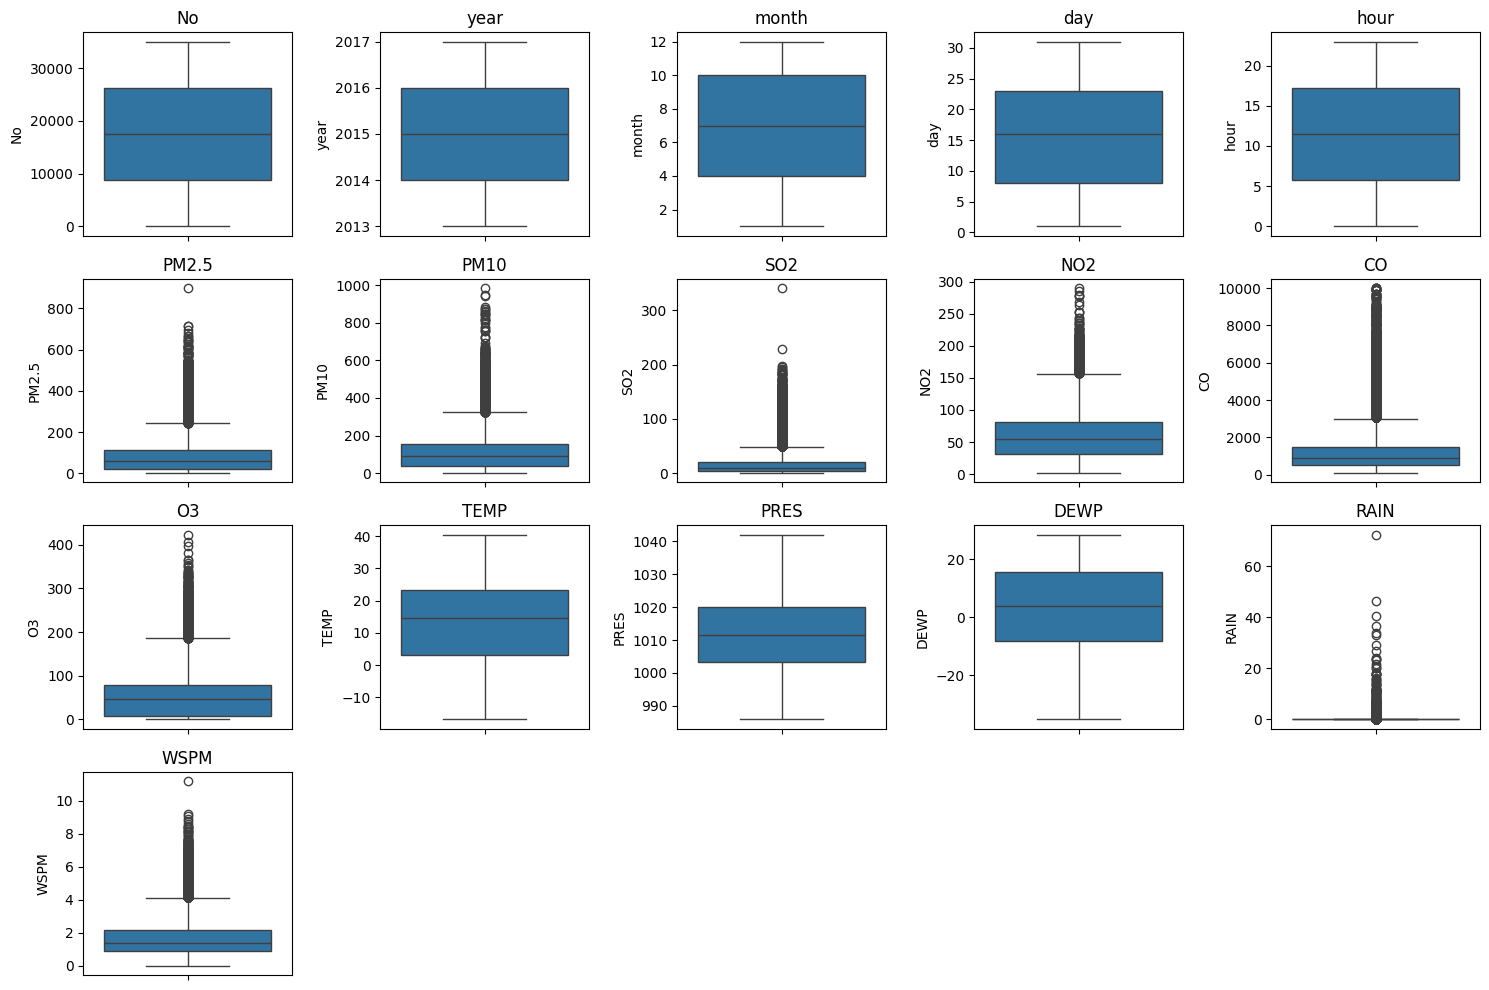

In [10]:
numerical_columns = data_aotizhongxin.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_aotizhongxin[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Changping

**Gathering Data**

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [12]:
data_changping = pd.read_csv("/content/PRSA_Data_Changping_20130301-20170228.csv")
print("Data Changping:")
print(data_changping)

Data Changping:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM    station
0          1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3  1020.8 -19.7   0.0    E   0.5  Changping
1          2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Changping
2          3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Changping
3          4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Changping
4          5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Changping
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...     ...   ...   ...  ...   ...        ...
35059  35060  2017      2   28    19   28.0  47.0   4.0  14.0  300.0   NaN  11.7  1008.9 -13.3   0.0  NNE   1.3  Changping


**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [13]:
data_changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [14]:
data_changping.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [15]:
data_changping.duplicated().sum()

np.int64(0)

In [16]:
data_changping.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000  35021.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     71.099743     94.657871     14.958906     44.182086   1152.301345     57.940003     13.686111   1007.760278      1.505495      0.060366      1.853836
std    10122.249256      1.177213      3.448752      8.800218      6.922285     72.326926     83.441738     20.975331     29.519796   1103.056282     54.316674     11.365313     10.225664     13.822099      0.752899      1.309808
min        1.000000   2013.000000      1.000000      1.000000      0.000000      2.000000      2.000000      0.285600      1.847700    100.000000      0.214200    -16.600000    982.400000    -35.100000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     18.000000     34.000000      2.000000     22.000000    500.000000     15.636600      3.400000    999.300000    -10.200000      0.000000      1.000000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     46.000000     72.000000      7.000000     36.000000    800.000000     46.000000     14.700000   1007.400000      1.800000      0.000000      1.500000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    100.000000    131.000000     18.000000     60.358200   1400.000000     80.000000     23.300000   1016.000000     14.200000      0.000000      2.300000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    882.000000    999.000000    310.000000    226.000000  10000.000000    429.000000     41.400000   1036.500000     27.200000     52.100000     10.000000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [17]:
data_changping['PM2.5'] = data_changping['PM2.5'].fillna(data_changping['PM2.5'].mean())
data_changping['PM10'] = data_changping['PM10'].fillna(data_changping['PM10'].mean())
data_changping['SO2'] = data_changping['SO2'].fillna(data_changping['SO2'].mean())
data_changping['NO2'] = data_changping['NO2'].fillna(data_changping['NO2'].mean())
data_changping['CO'] = data_changping['CO'].fillna(data_changping['CO'].mean())
data_changping['O3'] = data_changping['O3'].fillna(data_changping['O3'].mean())
data_changping['TEMP'] = data_changping['TEMP'].fillna(data_changping['TEMP'].mean())
data_changping['PRES'] = data_changping['PRES'].fillna(data_changping['PRES'].mean())
data_changping['DEWP'] = data_changping['DEWP'].fillna(data_changping['DEWP'].mean())
data_changping['RAIN'] = data_changping['RAIN'].fillna(data_changping['RAIN'].mean())
data_changping['wd'] = data_changping['wd'].fillna(data_changping['wd'].mode()[0])
data_changping['WSPM'] = data_changping['WSPM'].fillna(data_changping['WSPM'].mean())

In [18]:
data_changping.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

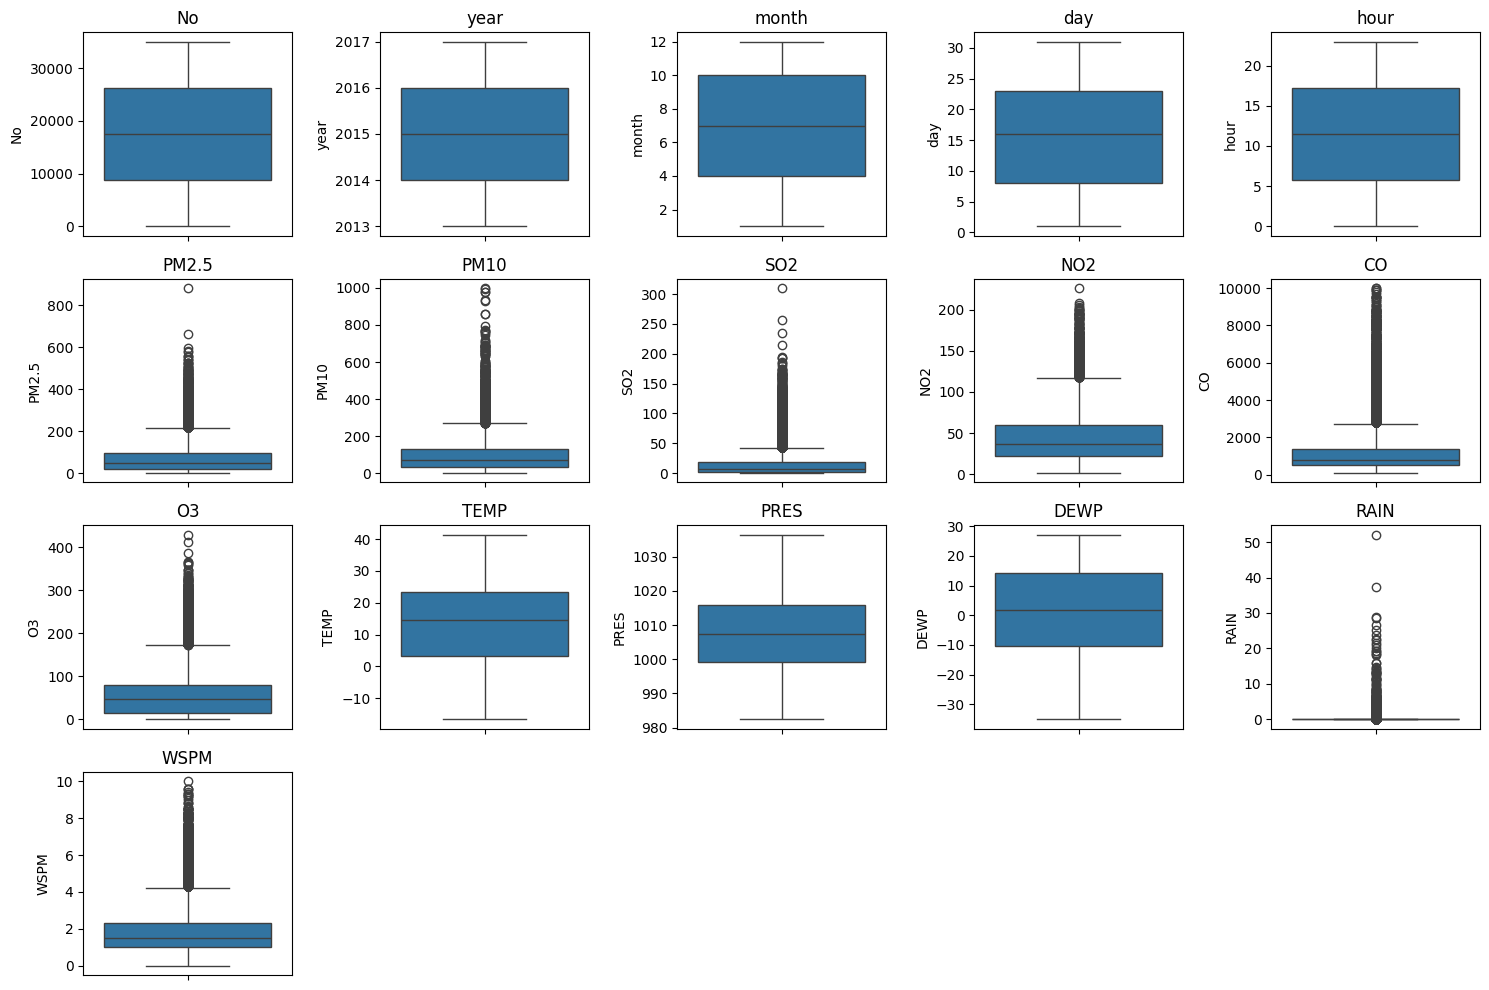

In [19]:
numerical_columns = data_changping.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_changping[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Dingling

**Gathering Data**

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [21]:
data_dingling = pd.read_csv("/content/PRSA_Data_Dingling_20130301-20170228.csv")
print("Data Dingling:")
print(data_dingling)

Data Dingling:
          No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station
0          1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0   82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling
1          2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0   80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling
2          3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0   79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling
3          4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0   79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling
4          5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0   81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling
...      ...   ...    ...  ...   ...    ...   ...  ...  ...    ...    ...   ...     ...   ...   ...  ...   ...       ...
35059  35060  2017      2   28    19   11.0  11.0  2.0  2.0  200.0   99.0  11.7  1008.9 -13.3   0.0  NNE   1.3  Dingling
35060  35061  201

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [22]:
data_dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [23]:
data_dingling.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [24]:
data_dingling.duplicated().sum()

np.int64(0)

In [25]:
data_dingling.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000  35021.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     65.989497     83.739723     11.749650     27.585467    904.896073     68.548371     13.686111   1007.760278      1.505495      0.060366      1.853836
std    10122.249256      1.177213      3.448752      8.800218      6.922285     72.267723     79.541685     15.519259     26.383882    903.306220     53.764424     11.365313     10.225664     13.822099      0.752899      1.309808
min        1.000000   2013.000000      1.000000      1.000000      0.000000      3.000000      2.000000      0.285600      1.026500    100.000000      0.214200    -16.600000    982.400000    -35.100000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     14.000000     26.000000      2.000000      9.000000    300.000000     31.000000      3.400000    999.300000    -10.200000      0.000000      1.000000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     41.000000     60.000000      5.000000     19.000000    600.000000     61.000000     14.700000   1007.400000      1.800000      0.000000      1.500000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000     93.000000    117.000000     15.000000     38.000000   1200.000000     90.000000     23.300000   1016.000000     14.200000      0.000000      2.300000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    881.000000    905.000000    156.000000    205.000000  10000.000000    500.000000     41.400000   1036.500000     27.200000     52.100000     10.000000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [26]:
data_dingling['PM2.5'] = data_dingling['PM2.5'].fillna(data_dingling['PM2.5'].mean())
data_dingling['PM10'] = data_dingling['PM10'].fillna(data_dingling['PM10'].mean())
data_dingling['SO2'] = data_dingling['SO2'].fillna(data_dingling['SO2'].mean())
data_dingling['NO2'] = data_dingling['NO2'].fillna(data_dingling['NO2'].mean())
data_dingling['CO'] = data_dingling['CO'].fillna(data_dingling['CO'].mean())
data_dingling['O3'] = data_dingling['O3'].fillna(data_dingling['O3'].mean())
data_dingling['TEMP'] = data_dingling['TEMP'].fillna(data_dingling['TEMP'].mean())
data_dingling['PRES'] = data_dingling['PRES'].fillna(data_dingling['PRES'].mean())
data_dingling['DEWP'] = data_dingling['DEWP'].fillna(data_dingling['DEWP'].mean())
data_dingling['RAIN'] = data_dingling['RAIN'].fillna(data_dingling['RAIN'].mean())
data_dingling['wd'] = data_dingling['wd'].fillna(data_dingling['wd'].mode()[0])
data_dingling['WSPM'] = data_dingling['WSPM'].fillna(data_dingling['WSPM'].mean())

In [27]:
data_dingling.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

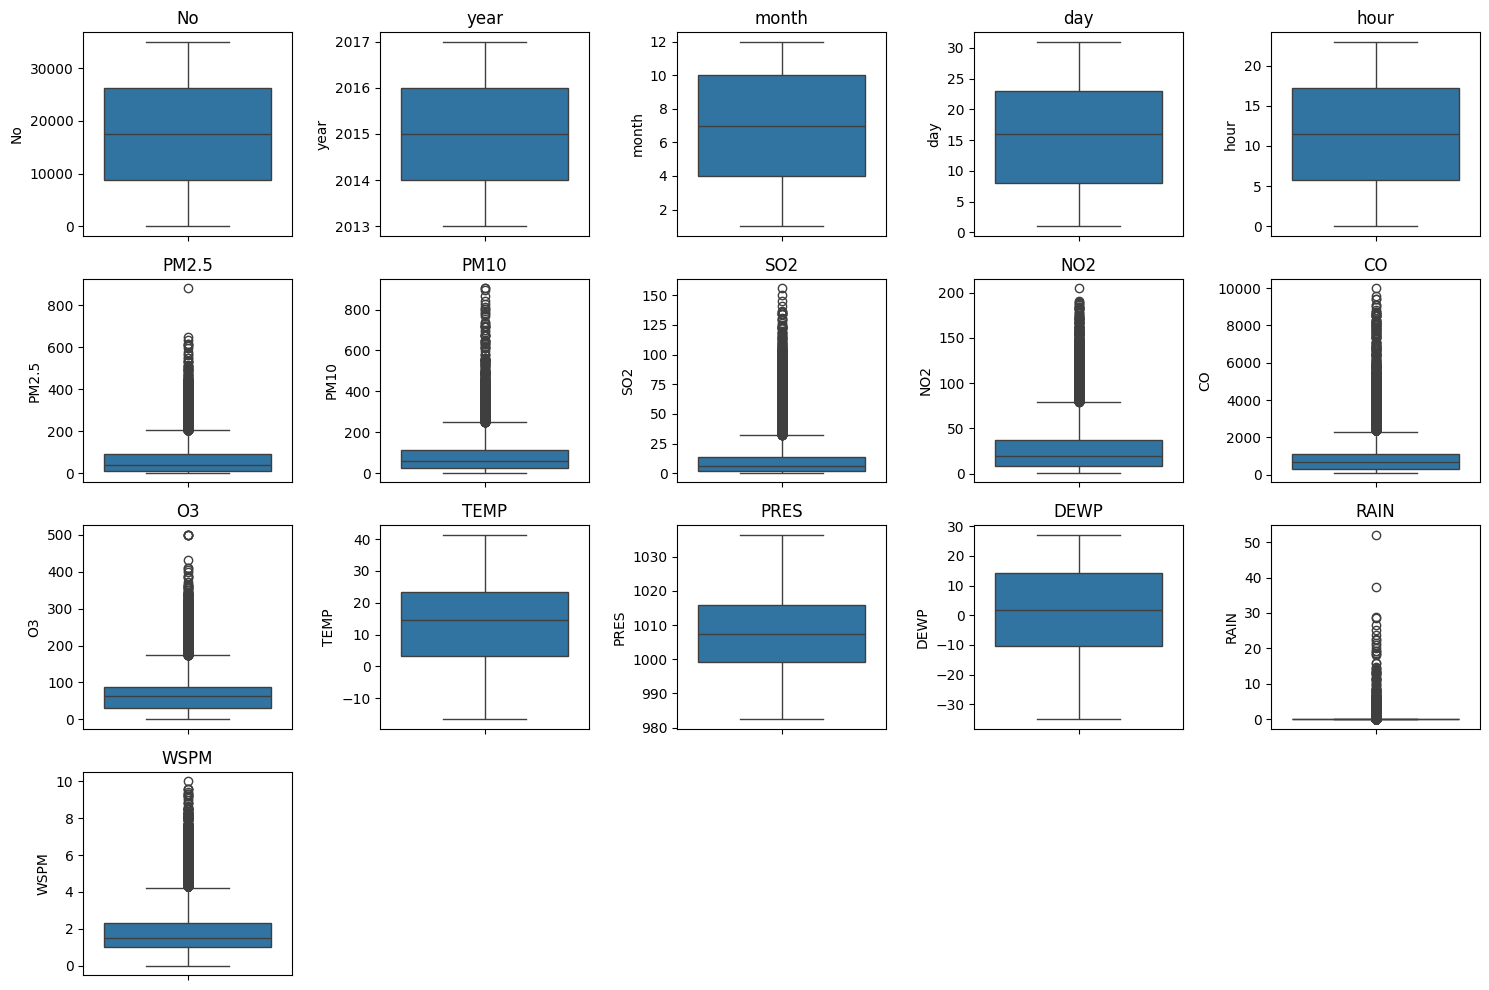

In [28]:
numerical_columns = data_dingling.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_dingling[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Dongsi

**Gathering Data**

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [30]:
data_dongsi = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
print("Data Dongsi:")
print(data_dongsi)

Data Dongsi:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station
0          1  2013      3    1     0    9.0   9.0   3.0  17.0   300.0  89.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Dongsi
1          2  2013      3    1     1    4.0   4.0   3.0  16.0   300.0  88.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Dongsi
2          3  2013      3    1     2    7.0   7.0   NaN  17.0   300.0  60.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Dongsi
3          4  2013      3    1     3    3.0   3.0   5.0  18.0     NaN   NaN  -1.4  1026.2 -25.5   0.0    N   4.9  Dongsi
4          5  2013      3    1     4    3.0   3.0   7.0   NaN   200.0  84.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Dongsi
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   ...     ...   ...   ...  ...   ...     ...
35059  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  73.0  12.5  1013.5 -16.2   0.0   NW   2.4  Dongsi
35060  35061  2017 

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [31]:
data_dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [32]:
data_dongsi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [33]:
data_dongsi.duplicated().sum()

np.int64(0)

In [34]:
data_dongsi.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000  35050.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     86.194297    110.336742     18.531107     53.699443   1330.069131     57.210637     13.671490   1012.547419      2.447535      0.064020      1.860785
std    10122.249256      1.177213      3.448752      8.800218      6.922285     86.575127     98.219860     22.905655     33.959230   1191.305887     58.033275     11.458418     10.266059     13.810696      0.786282      1.280368
min        1.000000   2013.000000      1.000000      1.000000      0.000000      3.000000      2.000000      0.285600      2.000000    100.000000      0.642600    -16.800000    987.100000    -35.300000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     22.000000     38.000000      4.000000     27.000000    600.000000     12.000000      3.100000   1004.000000     -8.800000      0.000000      1.000000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     61.000000     86.000000     10.000000     47.000000   1000.000000     44.125200     14.600000   1012.200000      3.000000      0.000000      1.500000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    119.000000    151.000000     24.000000     73.000000   1700.000000     81.000000     23.500000   1020.900000     15.000000      0.000000      2.400000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    737.000000    955.000000    300.000000    258.000000  10000.000000   1071.000000     41.100000   1042.000000     28.800000     46.400000     10.500000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [35]:
data_dongsi['PM2.5'] = data_dongsi['PM2.5'].fillna(data_dongsi['PM2.5'].mean())
data_dongsi['PM10'] = data_dongsi['PM10'].fillna(data_dongsi['PM10'].mean())
data_dongsi['SO2'] = data_dongsi['SO2'].fillna(data_dongsi['SO2'].mean())
data_dongsi['NO2'] = data_dongsi['NO2'].fillna(data_dongsi['NO2'].mean())
data_dongsi['CO'] = data_dongsi['CO'].fillna(data_dongsi['CO'].mean())
data_dongsi['O3'] = data_dongsi['O3'].fillna(data_dongsi['O3'].mean())
data_dongsi['TEMP'] = data_dongsi['TEMP'].fillna(data_dongsi['TEMP'].mean())
data_dongsi['PRES'] = data_dongsi['PRES'].fillna(data_dongsi['PRES'].mean())
data_dongsi['DEWP'] = data_dongsi['DEWP'].fillna(data_dongsi['DEWP'].mean())
data_dongsi['RAIN'] = data_dongsi['RAIN'].fillna(data_dongsi['RAIN'].mean())
data_dongsi['wd'] = data_dongsi['wd'].fillna(data_dongsi['wd'].mode()[0])
data_dongsi['WSPM'] = data_dongsi['WSPM'].fillna(data_dongsi['WSPM'].mean())

In [36]:
data_dongsi.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

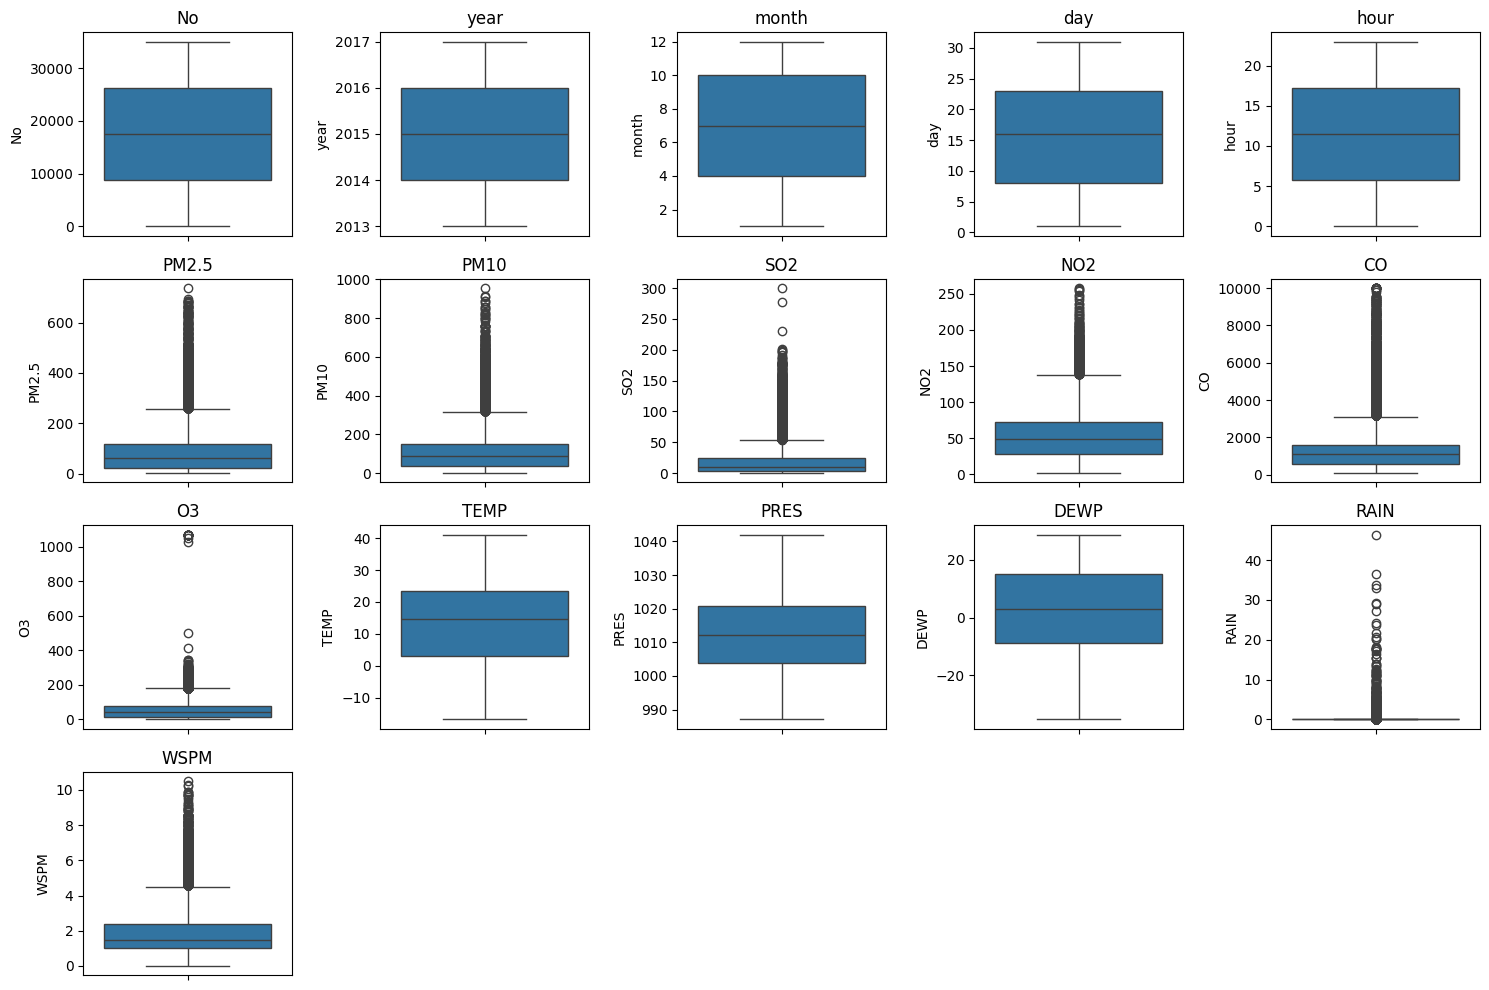

In [37]:
numerical_columns = data_dongsi.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_dongsi[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Gucheng

**Gathering Data**

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [39]:
data_gucheng = pd.read_csv("/content/PRSA_Data_Gucheng_20130301-20170228.csv")
print("Data Gucheng:")
print(data_gucheng)

Data Gucheng:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station
0          1  2013      3    1     0    6.0  18.0  5.0   NaN  800.0  88.0   0.1  1021.1 -18.6   0.0   NW   4.4  Gucheng
1          2  2013      3    1     1    6.0  15.0  5.0   NaN  800.0  88.0  -0.3  1021.5 -19.0   0.0   NW   4.0  Gucheng
2          3  2013      3    1     2    5.0  18.0  NaN   NaN  700.0  52.0  -0.7  1021.5 -19.8   0.0  WNW   4.6  Gucheng
3          4  2013      3    1     3    6.0  20.0  6.0   NaN    NaN   NaN  -1.0  1022.7 -21.2   0.0    W   2.8  Gucheng
4          5  2013      3    1     4    5.0  17.0  5.0   NaN  600.0  73.0  -1.3  1023.0 -21.4   0.0  WNW   3.6  Gucheng
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...     ...   ...   ...  ...   ...      ...
35059  35060  2017      2   28    19   14.0  58.0  4.0  19.0  500.0  56.0  12.8  1009.9 -17.0   0.0  NNW   3.1  Gucheng
35060  35061  2017      2 

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [40]:
data_gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [41]:
data_gucheng.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [42]:
data_gucheng.duplicated().sum()

np.int64(0)

In [43]:
data_gucheng.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000  35022.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     83.852089    118.861978     15.366162     55.871075   1323.974423     57.694879     13.864524   1008.829592      2.610442      0.064453      1.343310
std    10122.249256      1.177213      3.448752      8.800218      6.922285     82.796445     96.742626     21.204526     36.473860   1208.957772     57.019587     11.292857     10.103256     13.782991      0.838654      1.151064
min        1.000000   2013.000000      1.000000      1.000000      0.000000      2.000000      2.000000      0.285600      2.000000    100.000000      0.214200    -15.600000    984.000000    -34.600000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     24.000000     45.000000      2.000000     26.000000    600.000000     10.000000      3.600000   1000.500000     -8.900000      0.000000      0.600000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     60.000000     99.000000      7.000000     50.000000    900.000000     45.000000     14.800000   1008.500000      3.000000      0.000000      1.000000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    115.750000    167.000000     20.000000     79.000000   1600.000000     83.000000     23.500000   1017.000000     15.300000      0.000000      1.800000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    770.000000    994.000000    500.000000    276.000000  10000.000000    450.000000     41.600000   1038.100000     27.400000     41.900000     12.000000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [44]:
data_gucheng['PM2.5'] = data_gucheng['PM2.5'].fillna(data_gucheng['PM2.5'].mean())
data_gucheng['PM10'] = data_gucheng['PM10'].fillna(data_gucheng['PM10'].mean())
data_gucheng['SO2'] = data_gucheng['SO2'].fillna(data_gucheng['SO2'].mean())
data_gucheng['NO2'] = data_gucheng['NO2'].fillna(data_gucheng['NO2'].mean())
data_gucheng['CO'] = data_gucheng['CO'].fillna(data_gucheng['CO'].mean())
data_gucheng['O3'] = data_gucheng['O3'].fillna(data_gucheng['O3'].mean())
data_gucheng['TEMP'] = data_gucheng['TEMP'].fillna(data_gucheng['TEMP'].mean())
data_gucheng['PRES'] = data_gucheng['PRES'].fillna(data_gucheng['PRES'].mean())
data_gucheng['DEWP'] = data_gucheng['DEWP'].fillna(data_gucheng['DEWP'].mean())
data_gucheng['RAIN'] = data_gucheng['RAIN'].fillna(data_gucheng['RAIN'].mean())
data_gucheng['wd'] = data_gucheng['wd'].fillna(data_gucheng['wd'].mode()[0])
data_gucheng['WSPM'] = data_gucheng['WSPM'].fillna(data_gucheng['WSPM'].mean())

In [45]:
data_gucheng.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

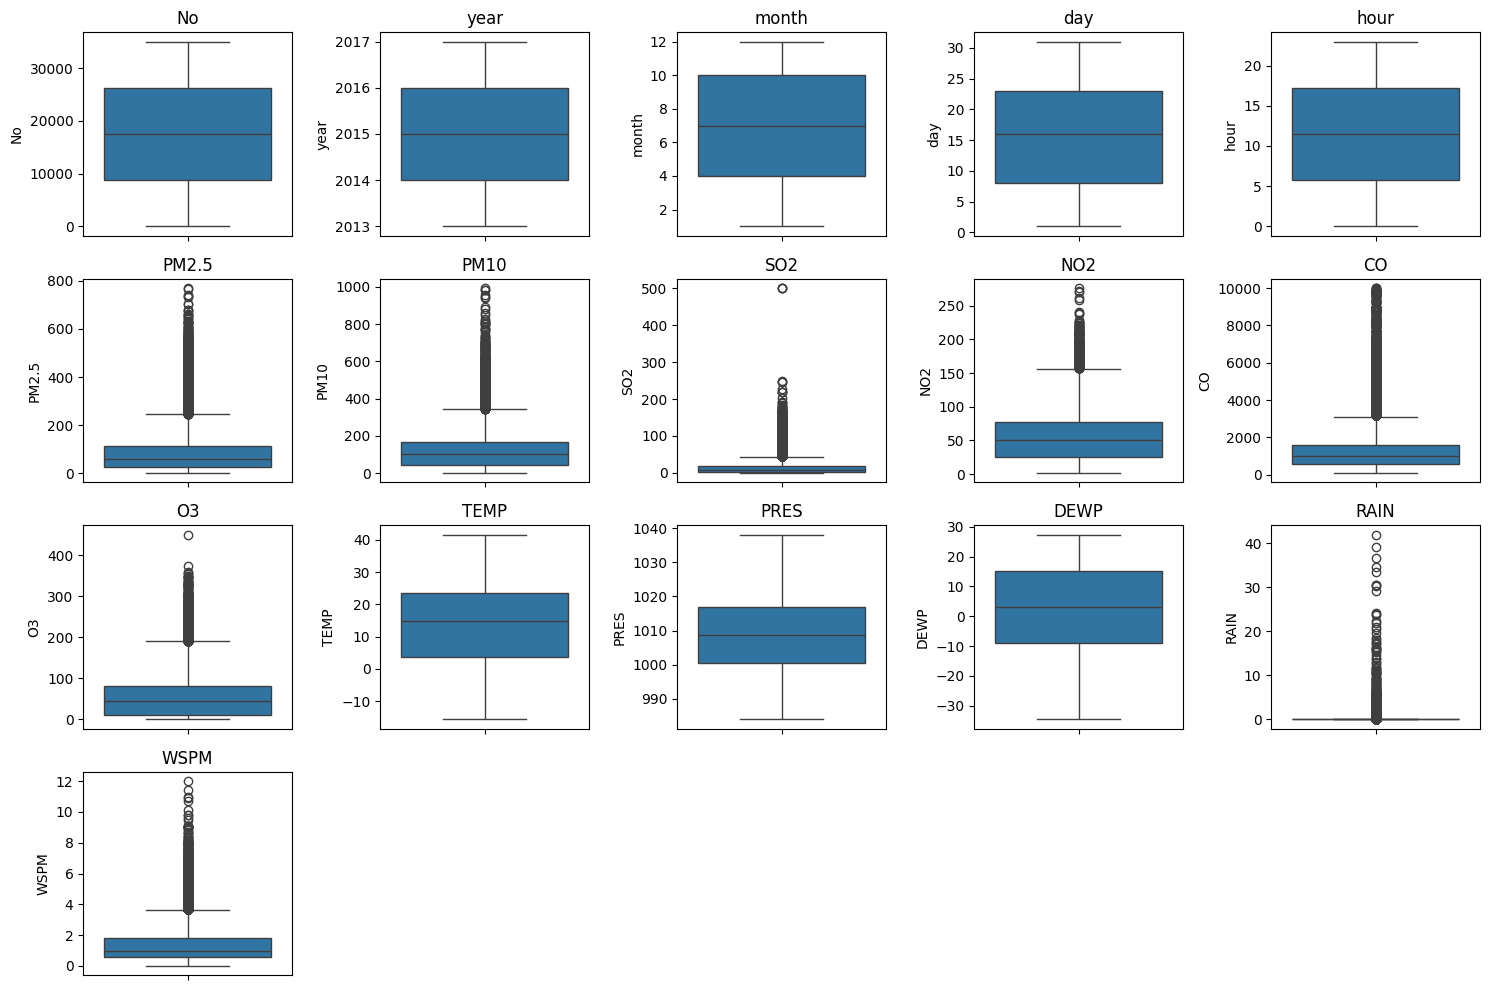

In [46]:
numerical_columns = data_gucheng.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_gucheng[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Huairou

**Gathering Data**

In [47]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [48]:
data_huairou = pd.read_csv("/content/PRSA_Data_Huairou_20130301-20170228.csv")
print("Data Huairou:")
print(data_huairou)

Data Huairou:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station
0          1  2013      3    1     0    7.0   7.0  3.0   2.0   100.0  91.0  -2.3  1020.3 -20.7   0.0  WNW   3.1  Huairou
1          2  2013      3    1     1    4.0   4.0  3.0   NaN   100.0  92.0  -2.7  1020.8 -20.5   0.0  NNW   1.5  Huairou
2          3  2013      3    1     2    4.0   4.0  NaN   NaN   100.0  91.0  -3.2  1020.6 -21.4   0.0   NW   1.8  Huairou
3          4  2013      3    1     3    3.0   3.0  3.0   2.0     NaN   NaN  -3.3  1021.3 -23.7   0.0  NNW   2.4  Huairou
4          5  2013      3    1     4    3.0   3.0  7.0   NaN   300.0  86.0  -4.1  1022.1 -22.7   0.0  NNW   2.2  Huairou
...      ...   ...    ...  ...   ...    ...   ...  ...   ...     ...   ...   ...     ...   ...   ...  ...   ...      ...
35059  35060  2017      2   28    19   16.0  28.0  2.0  19.0   300.0  95.0   9.9  1008.6 -14.1   0.0  WNW   1.8  Huairou
35060  35061  2017

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [49]:
data_huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [50]:
data_huairou.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [51]:
data_huairou.duplicated().sum()

np.int64(0)

In [52]:
data_huairou.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000  35015.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     69.626367     91.482690     12.121553     32.497250   1022.554545     59.824713     12.445426   1007.598568      2.238619      0.067940      1.652021
std    10122.249256      1.177213      3.448752      8.800218      6.922285     71.224916     83.289578     18.896912     26.489531    898.738241     54.605746     11.751103     10.022101     14.052541      0.849046      1.199143
min        1.000000   2013.000000      1.000000      1.000000      0.000000      2.000000      2.000000      0.285600      1.026500    100.000000      0.214200    -19.900000    982.800000    -43.400000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     17.000000     28.000000      2.000000     12.000000    400.000000     18.000000      2.100000    999.300000     -9.600000      0.000000      0.900000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     47.000000     69.000000      4.000000     25.000000    800.000000     49.000000     13.600000   1007.300000      2.700000      0.000000      1.300000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000     98.000000    131.000000     14.000000     46.000000   1300.000000     83.000000     22.300000   1015.500000     15.300000      0.000000      2.000000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    762.000000    993.000000    315.000000    231.000000  10000.000000    444.000000     40.300000   1036.500000     29.100000     45.900000     12.900000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [53]:
data_huairou['PM2.5'] = data_huairou['PM2.5'].fillna(data_huairou['PM2.5'].mean())
data_huairou['PM10'] = data_huairou['PM10'].fillna(data_huairou['PM10'].mean())
data_huairou['SO2'] = data_huairou['SO2'].fillna(data_huairou['SO2'].mean())
data_huairou['NO2'] = data_huairou['NO2'].fillna(data_huairou['NO2'].mean())
data_huairou['CO'] = data_huairou['CO'].fillna(data_huairou['CO'].mean())
data_huairou['O3'] = data_huairou['O3'].fillna(data_huairou['O3'].mean())
data_huairou['TEMP'] = data_huairou['TEMP'].fillna(data_huairou['TEMP'].mean())
data_huairou['PRES'] = data_huairou['PRES'].fillna(data_huairou['PRES'].mean())
data_huairou['DEWP'] = data_huairou['DEWP'].fillna(data_huairou['DEWP'].mean())
data_huairou['RAIN'] = data_huairou['RAIN'].fillna(data_huairou['RAIN'].mean())
data_huairou['wd'] = data_huairou['wd'].fillna(data_huairou['wd'].mode()[0])
data_huairou['WSPM'] = data_huairou['WSPM'].fillna(data_huairou['WSPM'].mean())

In [54]:
data_huairou.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

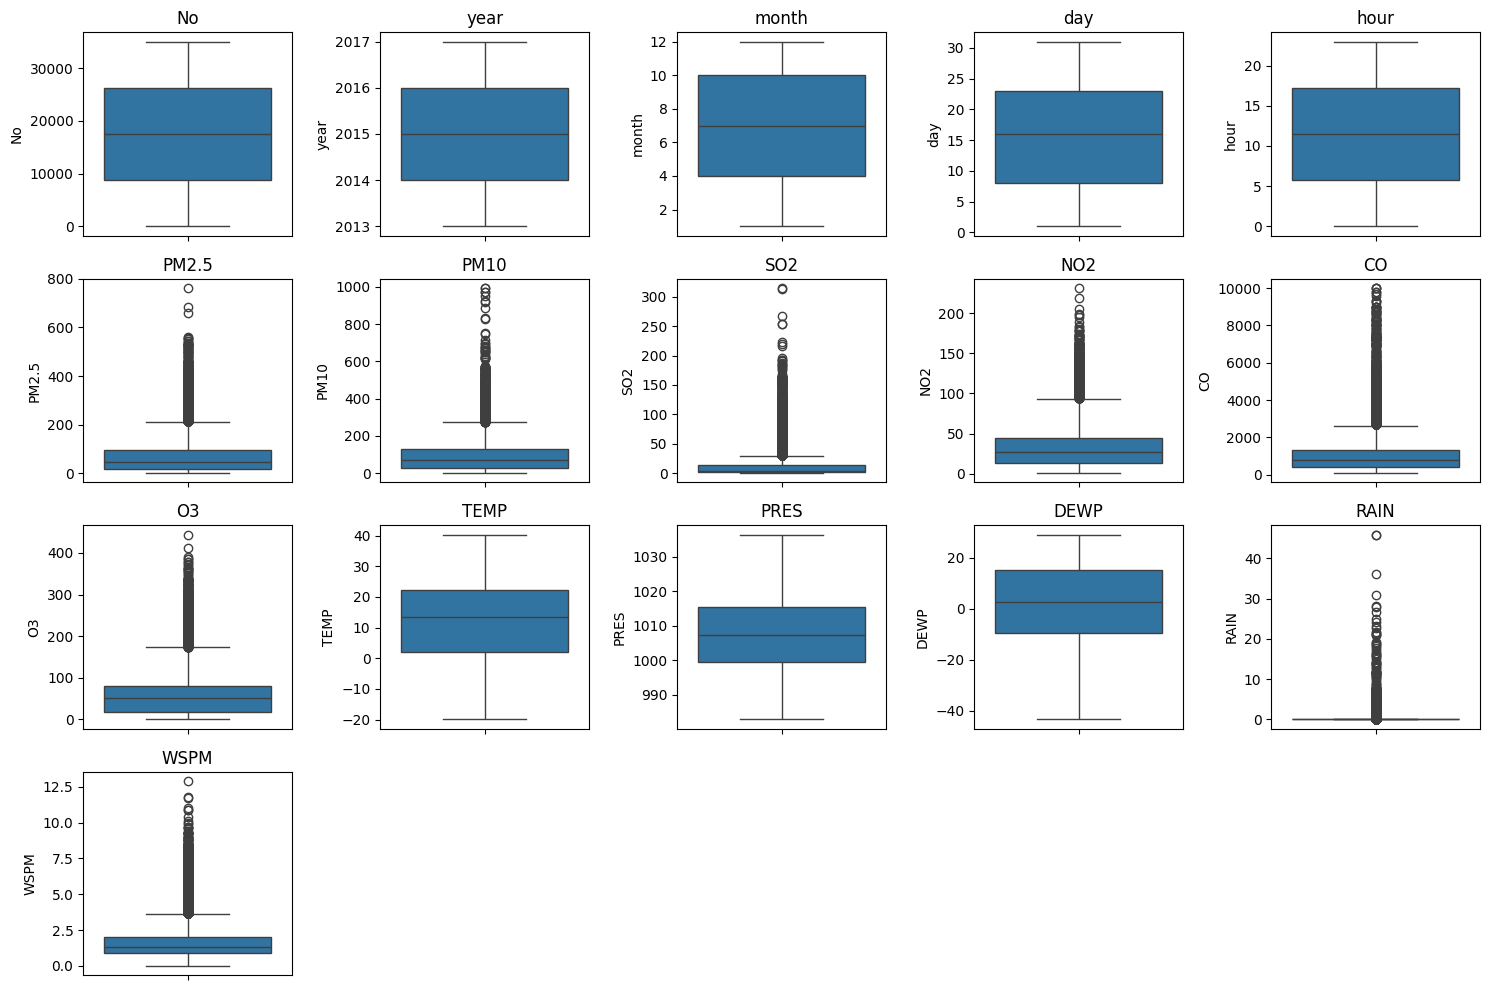

In [55]:
numerical_columns = data_huairou.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_huairou[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Nongzhanguan

**Gathering Data**

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [57]:
data_nongzhanguan = pd.read_csv("/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
print("Data Nongzhanguan:")
print(data_nongzhanguan)

Data Nongzhanguan:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM       station
0          1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan
1          2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan
2          3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan
3          4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4  1026.2 -25.5   0.0    N   4.9  Nongzhanguan
4          5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...     ...   ...   ...  ...   ...           ...
35059  35060  2017      2   28    19   14.0  21.0  3.0  27.0  400.0  72.0  12.5  1013.5 -16.2   0.0   NW  

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [58]:
data_nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [59]:
data_nongzhanguan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [60]:
data_nongzhanguan.duplicated().sum()

np.int64(0)

In [61]:
data_nongzhanguan.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000  35050.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     84.838483    108.991096     18.689242     58.097172   1324.350198     58.534682     13.671490   1012.547419      2.447535      0.064020      1.860785
std    10122.249256      1.177213      3.448752      8.800218      6.922285     86.225344     95.341177     24.280665     36.297740   1245.166124     58.401448     11.458418     10.266059     13.810696      0.786282      1.280368
min        1.000000   2013.000000      1.000000      1.000000      0.000000      2.000000      2.000000      0.571200      2.000000    100.000000      0.214200    -16.800000    987.100000    -35.300000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     22.000000     38.000000      3.000000     29.000000    500.000000     10.000000      3.100000   1004.000000     -8.800000      0.000000      1.000000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     59.000000     85.000000      9.000000     51.000000    900.000000     45.000000     14.600000   1012.200000      3.000000      0.000000      1.500000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    116.000000    149.000000     23.000000     80.000000   1600.000000     84.000000     23.500000   1020.900000     15.000000      0.000000      2.400000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    844.000000    995.000000    257.000000    273.000000  10000.000000    390.000000     41.100000   1042.000000     28.800000     46.400000     10.500000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [62]:
data_nongzhanguan['PM2.5'] = data_nongzhanguan['PM2.5'].fillna(data_nongzhanguan['PM2.5'].mean())
data_nongzhanguan['PM10'] = data_nongzhanguan['PM10'].fillna(data_nongzhanguan['PM10'].mean())
data_nongzhanguan['SO2'] = data_nongzhanguan['SO2'].fillna(data_nongzhanguan['SO2'].mean())
data_nongzhanguan['NO2'] = data_nongzhanguan['NO2'].fillna(data_nongzhanguan['NO2'].mean())
data_nongzhanguan['CO'] = data_nongzhanguan['CO'].fillna(data_nongzhanguan['CO'].mean())
data_nongzhanguan['O3'] = data_nongzhanguan['O3'].fillna(data_nongzhanguan['O3'].mean())
data_nongzhanguan['TEMP'] = data_nongzhanguan['TEMP'].fillna(data_nongzhanguan['TEMP'].mean())
data_nongzhanguan['PRES'] = data_nongzhanguan['PRES'].fillna(data_nongzhanguan['PRES'].mean())
data_nongzhanguan['DEWP'] = data_nongzhanguan['DEWP'].fillna(data_nongzhanguan['DEWP'].mean())
data_nongzhanguan['RAIN'] = data_nongzhanguan['RAIN'].fillna(data_nongzhanguan['RAIN'].mean())
data_nongzhanguan['wd'] = data_nongzhanguan['wd'].fillna(data_nongzhanguan['wd'].mode()[0])
data_nongzhanguan['WSPM'] = data_nongzhanguan['WSPM'].fillna(data_nongzhanguan['WSPM'].mean())

In [63]:
data_nongzhanguan.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

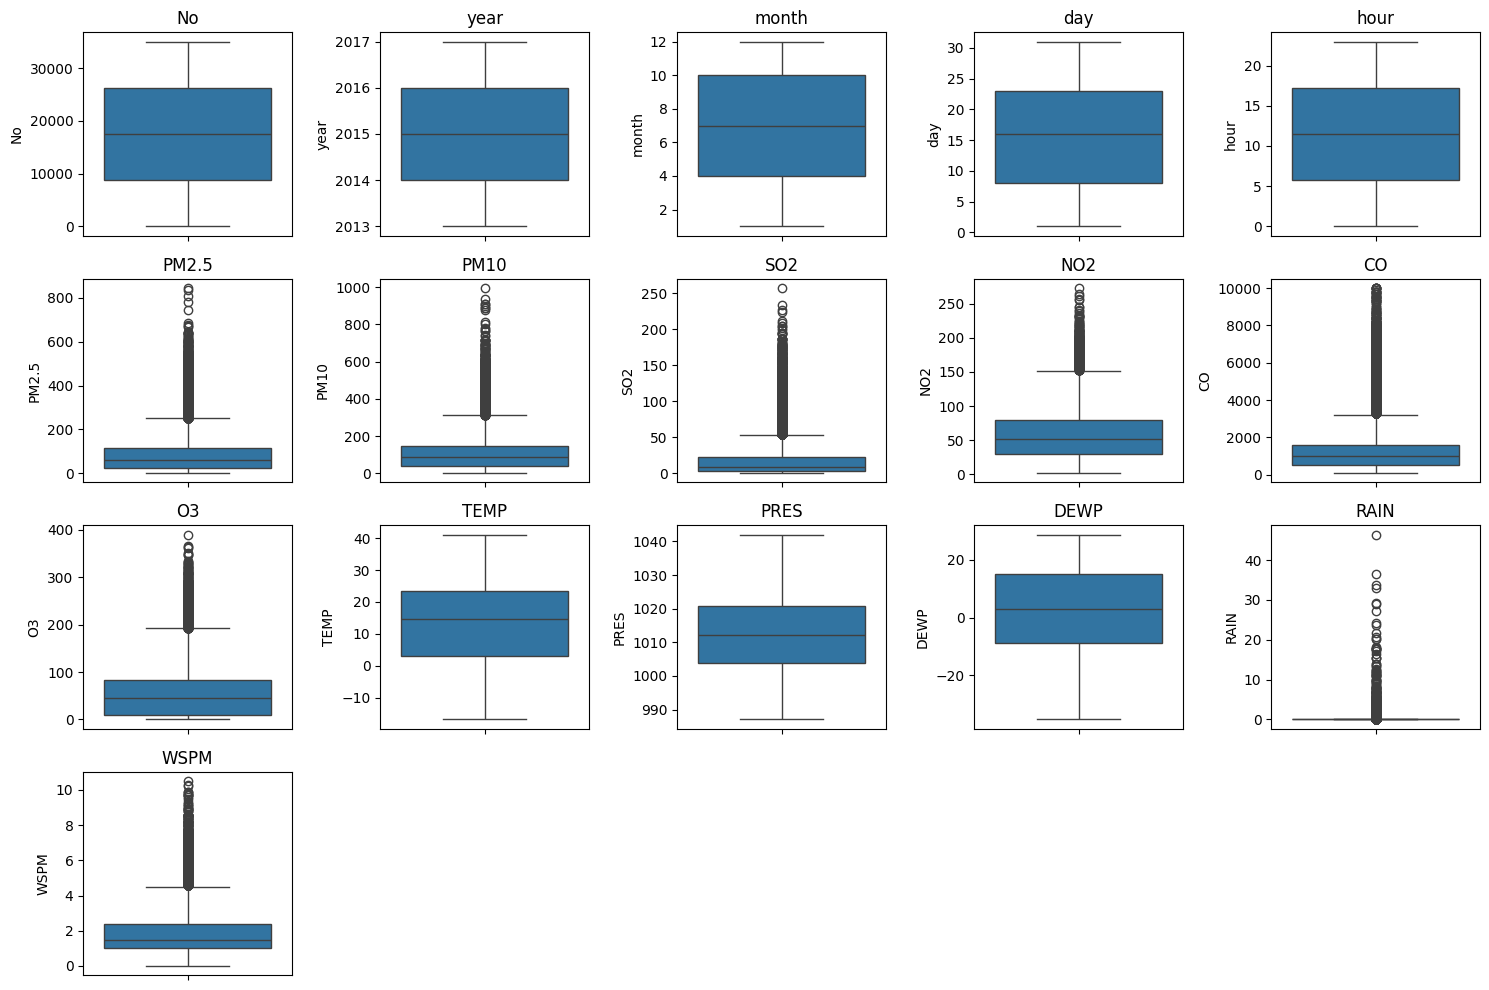

In [64]:
numerical_columns = data_nongzhanguan.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_nongzhanguan[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Shunyi

**Gathering Data**

In [65]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [66]:
data_shunyi = pd.read_csv("/content/PRSA_Data_Shunyi_20130301-20170228.csv")
print("Data Shunyi:")
print(data_shunyi)

Data Shunyi:
          No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station
0          1  2013      3    1     0    3.0   6.0   3.0   8.0   300.0  44.0  -0.9  1025.8 -20.5   0.0   NW   9.3  Shunyi
1          2  2013      3    1     1   12.0  12.0   3.0   7.0   300.0  47.0  -1.1  1026.1 -21.3   0.0   NW   9.4  Shunyi
2          3  2013      3    1     2   14.0  14.0   NaN   7.0   200.0  22.0  -1.7  1026.2 -23.0   0.0   NW   8.6  Shunyi
3          4  2013      3    1     3   12.0  12.0   3.0   5.0     NaN   NaN  -2.1  1027.3 -23.3   0.0   NW   6.6  Shunyi
4          5  2013      3    1     4   12.0  12.0   3.0   NaN   200.0  11.0  -2.4  1027.7 -22.9   0.0   NW   4.5  Shunyi
...      ...   ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   ...     ...   ...   ...  ...   ...     ...
35059  35060  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0  10.3  1014.2 -12.4   0.0    W   1.8  Shunyi
35060  35061  2017 

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [67]:
data_shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [68]:
data_shunyi.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [69]:
data_shunyi.duplicated().sum()

np.int64(0)

In [70]:
data_shunyi.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000  35020.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     79.491602     98.737026     13.572039     43.908865   1187.063979     55.201321     13.387969   1013.061938      2.465036      0.061094      1.807533
std    10122.249256      1.177213      3.448752      8.800218      6.922285     81.231739     89.143718     19.572068     30.996828   1156.374102     54.873726     11.483588     10.177339     13.726622      0.761668      1.287817
min        1.000000   2013.000000      1.000000      1.000000      0.000000      2.000000      2.000000      0.285600      2.000000    100.000000      0.214200    -16.800000    988.000000    -36.000000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     19.000000     31.000000      2.000000     19.000000    400.000000     10.000000      3.000000   1004.700000     -8.800000      0.000000      1.000000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     55.000000     77.000000      5.000000     37.000000    800.000000     43.000000     14.400000   1012.700000      3.100000      0.000000      1.500000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    112.000000    138.000000     17.000000     62.000000   1500.000000     77.000000     23.200000   1021.000000     15.100000      0.000000      2.300000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    941.000000    999.000000    239.000000    258.000000  10000.000000    351.716400     40.600000   1042.800000     27.500000     37.300000     12.800000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [71]:
data_shunyi['PM2.5'] = data_shunyi['PM2.5'].fillna(data_shunyi['PM2.5'].mean())
data_shunyi['PM10'] = data_shunyi['PM10'].fillna(data_shunyi['PM10'].mean())
data_shunyi['SO2'] = data_shunyi['SO2'].fillna(data_shunyi['SO2'].mean())
data_shunyi['NO2'] = data_shunyi['NO2'].fillna(data_shunyi['NO2'].mean())
data_shunyi['CO'] = data_shunyi['CO'].fillna(data_shunyi['CO'].mean())
data_shunyi['O3'] = data_shunyi['O3'].fillna(data_shunyi['O3'].mean())
data_shunyi['TEMP'] = data_shunyi['TEMP'].fillna(data_shunyi['TEMP'].mean())
data_shunyi['PRES'] = data_shunyi['PRES'].fillna(data_shunyi['PRES'].mean())
data_shunyi['DEWP'] = data_shunyi['DEWP'].fillna(data_shunyi['DEWP'].mean())
data_shunyi['RAIN'] = data_shunyi['RAIN'].fillna(data_shunyi['RAIN'].mean())
data_shunyi['wd'] = data_shunyi['wd'].fillna(data_shunyi['wd'].mode()[0])
data_shunyi['WSPM'] = data_shunyi['WSPM'].fillna(data_shunyi['WSPM'].mean())

In [72]:
data_shunyi.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

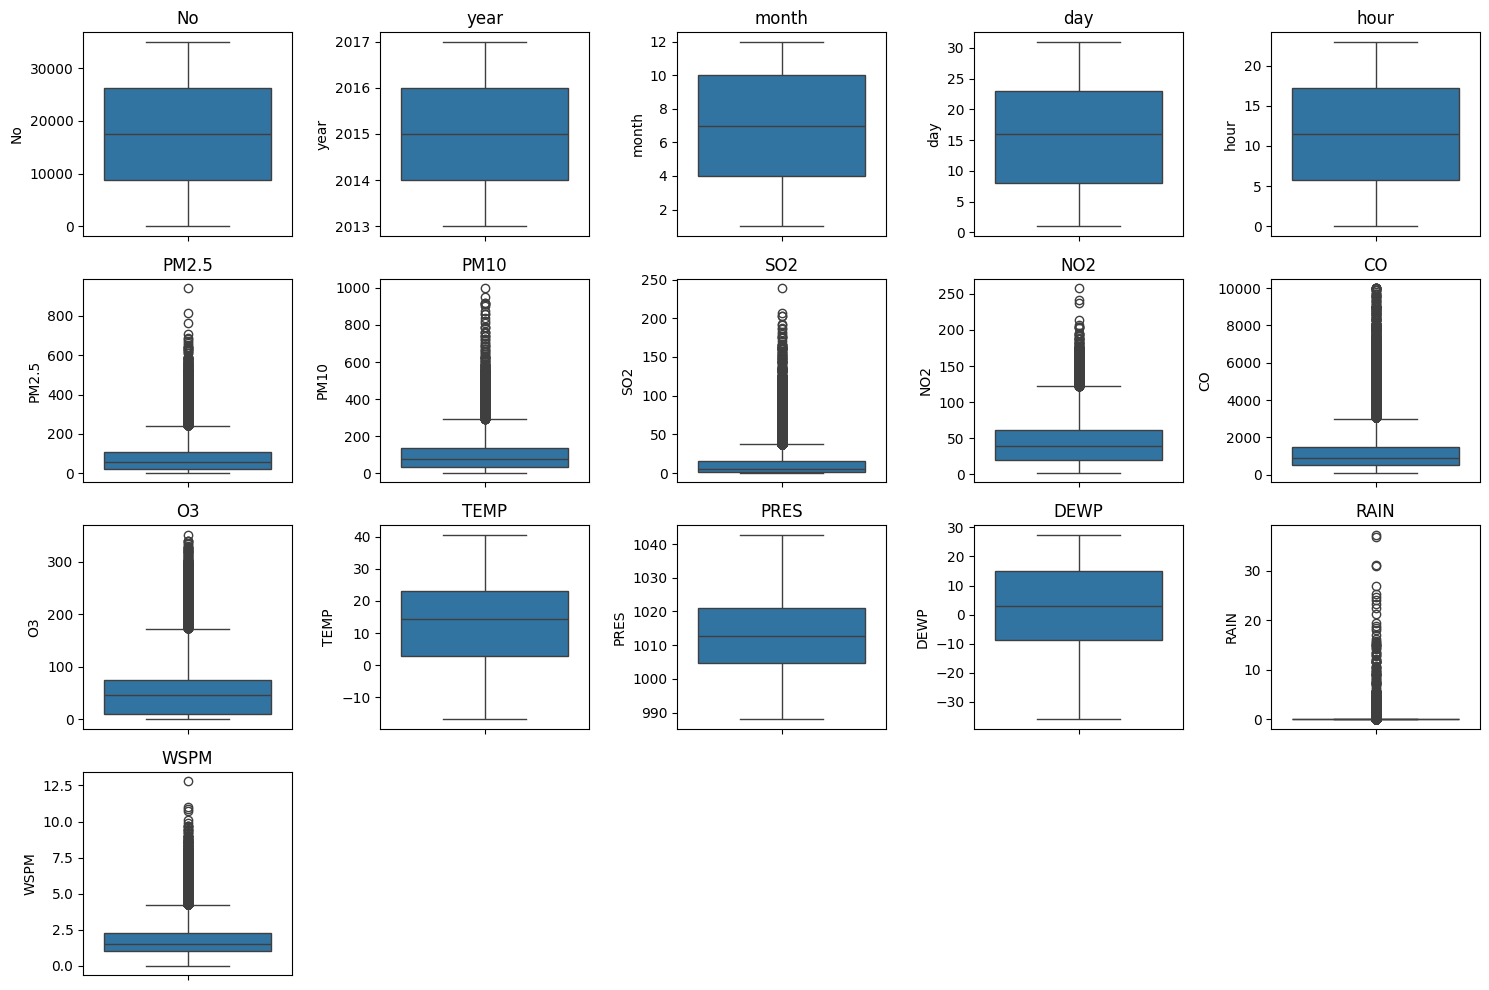

In [73]:
numerical_columns = data_shunyi.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_shunyi[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Tiantan

**Gathering Data**

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [75]:
data_tiantan = pd.read_csv("/content/PRSA_Data_Tiantan_20130301-20170228.csv")
print("Data Tiantan:")
print(data_tiantan)

Data Tiantan:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  station
0          1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5  1024.5 -21.4   0.0  NNW   5.7  Tiantan
1          2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7  1025.1 -22.1   0.0   NW   3.9  Tiantan
2          3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2  1025.3 -24.6   0.0  NNW   5.3  Tiantan
3          4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4  1026.2 -25.5   0.0    N   4.9  Tiantan
4          5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9  1027.1 -24.5   0.0  NNW   3.2  Tiantan
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...     ...   ...   ...  ...   ...      ...
35059  35060  2017      2   28    19   20.0  48.0  2.0   NaN  500.0   NaN  12.5  1013.5 -16.2   0.0   NW   2.4  Tiantan
35060  35061  2017      2 

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [76]:
data_tiantan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [77]:
data_tiantan.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [78]:
data_tiantan.duplicated().sum()

np.int64(0)

In [79]:
data_tiantan.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000  35050.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     82.164911    106.363672     14.367615     53.162646   1298.303318     55.984297     13.671490   1012.547419      2.447535      0.064020      1.860785
std    10122.249256      1.177213      3.448752      8.800218      6.922285     80.921384     89.700157     20.144631     31.946224   1170.593297     59.081528     11.458418     10.266059     13.810696      0.786282      1.280368
min        1.000000   2013.000000      1.000000      1.000000      0.000000      3.000000      2.000000      0.571200      2.000000    100.000000      0.428400    -16.800000    987.100000    -35.300000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     22.000000     41.000000      3.000000     28.000000    500.000000      8.000000      3.100000   1004.000000     -8.800000      0.000000      1.000000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     59.000000     85.000000      7.000000     47.000000    900.000000     40.000000     14.600000   1012.200000      3.000000      0.000000      1.500000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    113.000000    144.000000     17.000000     71.000000   1600.000000     81.000000     23.500000   1020.900000     15.000000      0.000000      2.400000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    821.000000    988.000000    273.000000    241.000000  10000.000000    674.000000     41.100000   1042.000000     28.800000     46.400000     10.500000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [80]:
data_tiantan['PM2.5'] = data_tiantan['PM2.5'].fillna(data_tiantan['PM2.5'].mean())
data_tiantan['PM10'] = data_tiantan['PM10'].fillna(data_tiantan['PM10'].mean())
data_tiantan['SO2'] = data_tiantan['SO2'].fillna(data_tiantan['SO2'].mean())
data_tiantan['NO2'] = data_tiantan['NO2'].fillna(data_tiantan['NO2'].mean())
data_tiantan['CO'] = data_tiantan['CO'].fillna(data_tiantan['CO'].mean())
data_tiantan['O3'] = data_tiantan['O3'].fillna(data_tiantan['O3'].mean())
data_tiantan['TEMP'] = data_tiantan['TEMP'].fillna(data_tiantan['TEMP'].mean())
data_tiantan['PRES'] = data_tiantan['PRES'].fillna(data_tiantan['PRES'].mean())
data_tiantan['DEWP'] = data_tiantan['DEWP'].fillna(data_tiantan['DEWP'].mean())
data_tiantan['RAIN'] = data_tiantan['RAIN'].fillna(data_tiantan['RAIN'].mean())
data_tiantan['wd'] = data_tiantan['wd'].fillna(data_tiantan['wd'].mode()[0])
data_tiantan['WSPM'] = data_tiantan['WSPM'].fillna(data_tiantan['WSPM'].mean())

In [81]:
data_tiantan.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

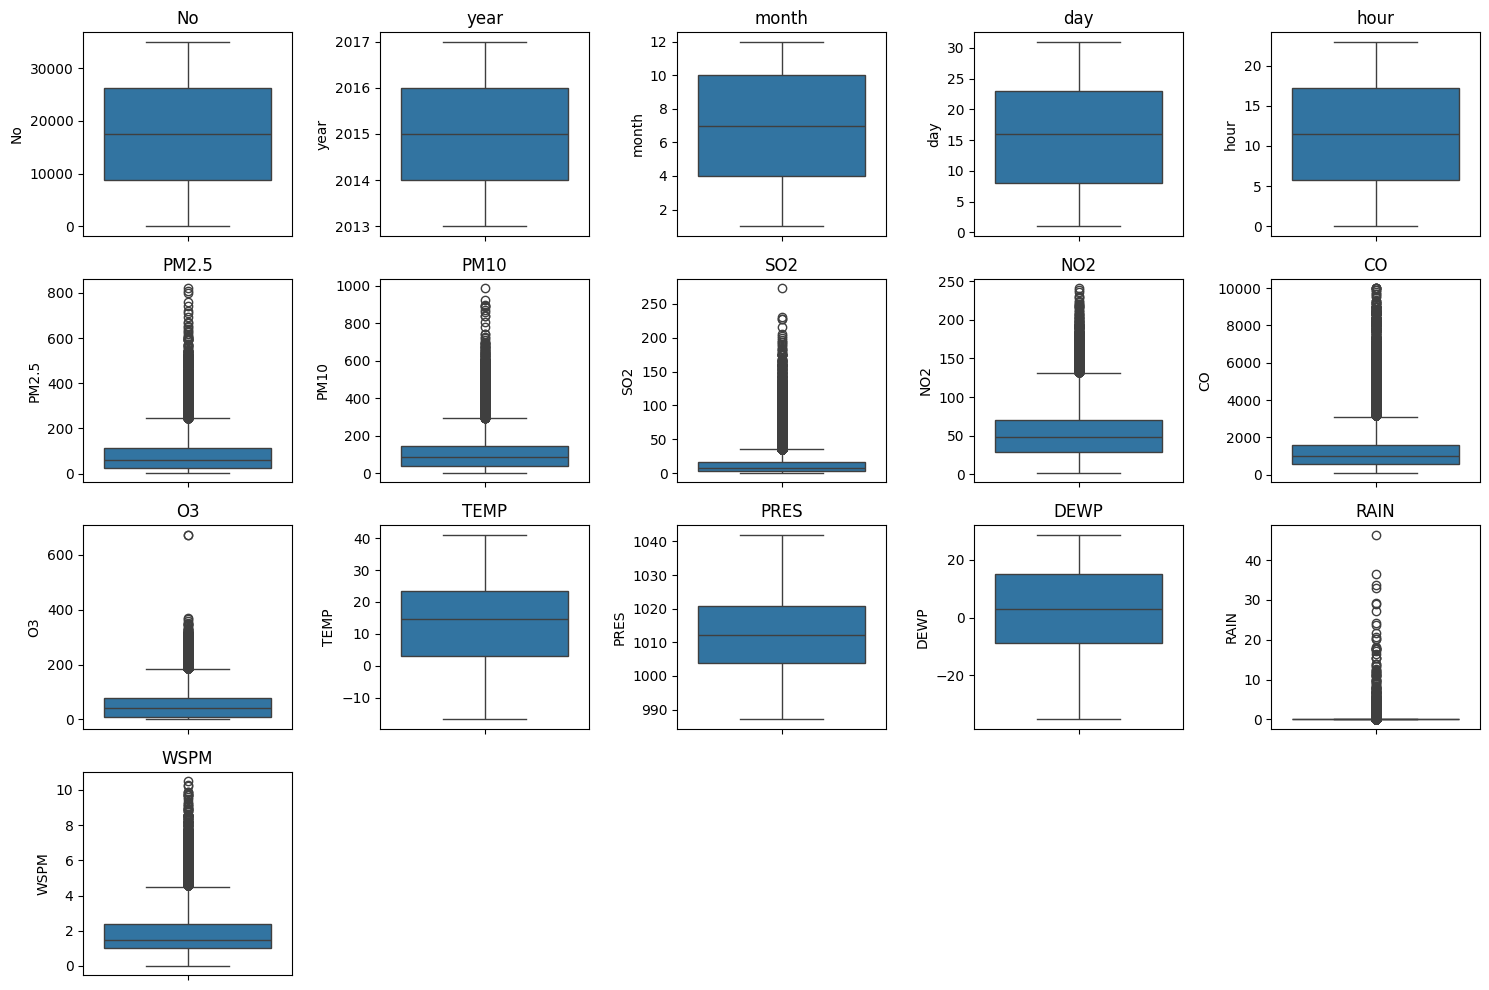

In [82]:
numerical_columns = data_tiantan.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_tiantan[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Wanliu

**Gathering Data**

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [84]:
data_wanliu = pd.read_csv("/content/PRSA_Data_Wanliu_20130301-20170228.csv")
print("Data Wanliu:")
print(data_wanliu)

Data Wanliu:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station
0          1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Wanliu
1          2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1  1023.2 -18.2   0.0    N   4.7  Wanliu
2          3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1  1023.5 -18.2   0.0  NNW   5.6  Wanliu
3          4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4  1024.5 -19.4   0.0   NW   3.1  Wanliu
4          5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0  1025.2 -19.5   0.0    N   2.0  Wanliu
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...     ...   ...   ...  ...   ...     ...
35059  35060  2017      2   28    19   11.0  27.0  4.0  20.0  300.0  81.0  12.6  1011.9 -14.3   0.0    N   2.0  Wanliu
35060  35061  2017      2   28    2

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [85]:
data_wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [86]:
data_wanliu.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [87]:
data_wanliu.duplicated().sum()

np.int64(0)

In [88]:
data_wanliu.describe()

No          year         month           day          hour         PM2.5          PM10           SO2           NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000  35050.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     83.374716    110.464618     18.376481     65.258789   1319.353513     48.873614     13.428865   1011.097536      3.266588      0.068263      1.501215
std    10122.249256      1.177213      3.448752      8.800218      6.922285     81.905568     92.795065     22.609648     37.996088   1268.114331     55.111740     11.346931     10.355247     13.678060      0.896726      1.104472
min        1.000000   2013.000000      1.000000      1.000000      0.000000      2.000000      2.000000      0.285600      1.642400    100.000000      0.214200    -15.800000    985.900000    -34.900000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     23.000000     40.000000      4.000000     36.000000    500.000000      4.000000      3.200000   1002.500000     -8.100000      0.000000      0.800000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     59.000000     88.000000     10.000000     60.000000    900.000000     32.000000     14.300000   1010.800000      4.000000      0.000000      1.200000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    116.000000    153.000000     23.000000     88.000000   1600.000000     73.000000     22.900000   1019.400000     15.800000      0.000000      2.000000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    957.000000    951.000000    282.000000    264.000000  10000.000000    364.000000     40.500000   1040.300000     28.500000     72.500000     11.200000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [89]:
data_wanliu['PM2.5'] = data_wanliu['PM2.5'].fillna(data_wanliu['PM2.5'].mean())
data_wanliu['PM10'] = data_wanliu['PM10'].fillna(data_wanliu['PM10'].mean())
data_wanliu['SO2'] = data_wanliu['SO2'].fillna(data_wanliu['SO2'].mean())
data_wanliu['NO2'] = data_wanliu['NO2'].fillna(data_wanliu['NO2'].mean())
data_wanliu['CO'] = data_wanliu['CO'].fillna(data_wanliu['CO'].mean())
data_wanliu['O3'] = data_wanliu['O3'].fillna(data_wanliu['O3'].mean())
data_wanliu['TEMP'] = data_wanliu['TEMP'].fillna(data_wanliu['TEMP'].mean())
data_wanliu['PRES'] = data_wanliu['PRES'].fillna(data_wanliu['PRES'].mean())
data_wanliu['DEWP'] = data_wanliu['DEWP'].fillna(data_wanliu['DEWP'].mean())
data_wanliu['RAIN'] = data_wanliu['RAIN'].fillna(data_wanliu['RAIN'].mean())
data_wanliu['wd'] = data_wanliu['wd'].fillna(data_wanliu['wd'].mode()[0])
data_wanliu['WSPM'] = data_wanliu['WSPM'].fillna(data_wanliu['WSPM'].mean())

In [90]:
data_wanliu.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

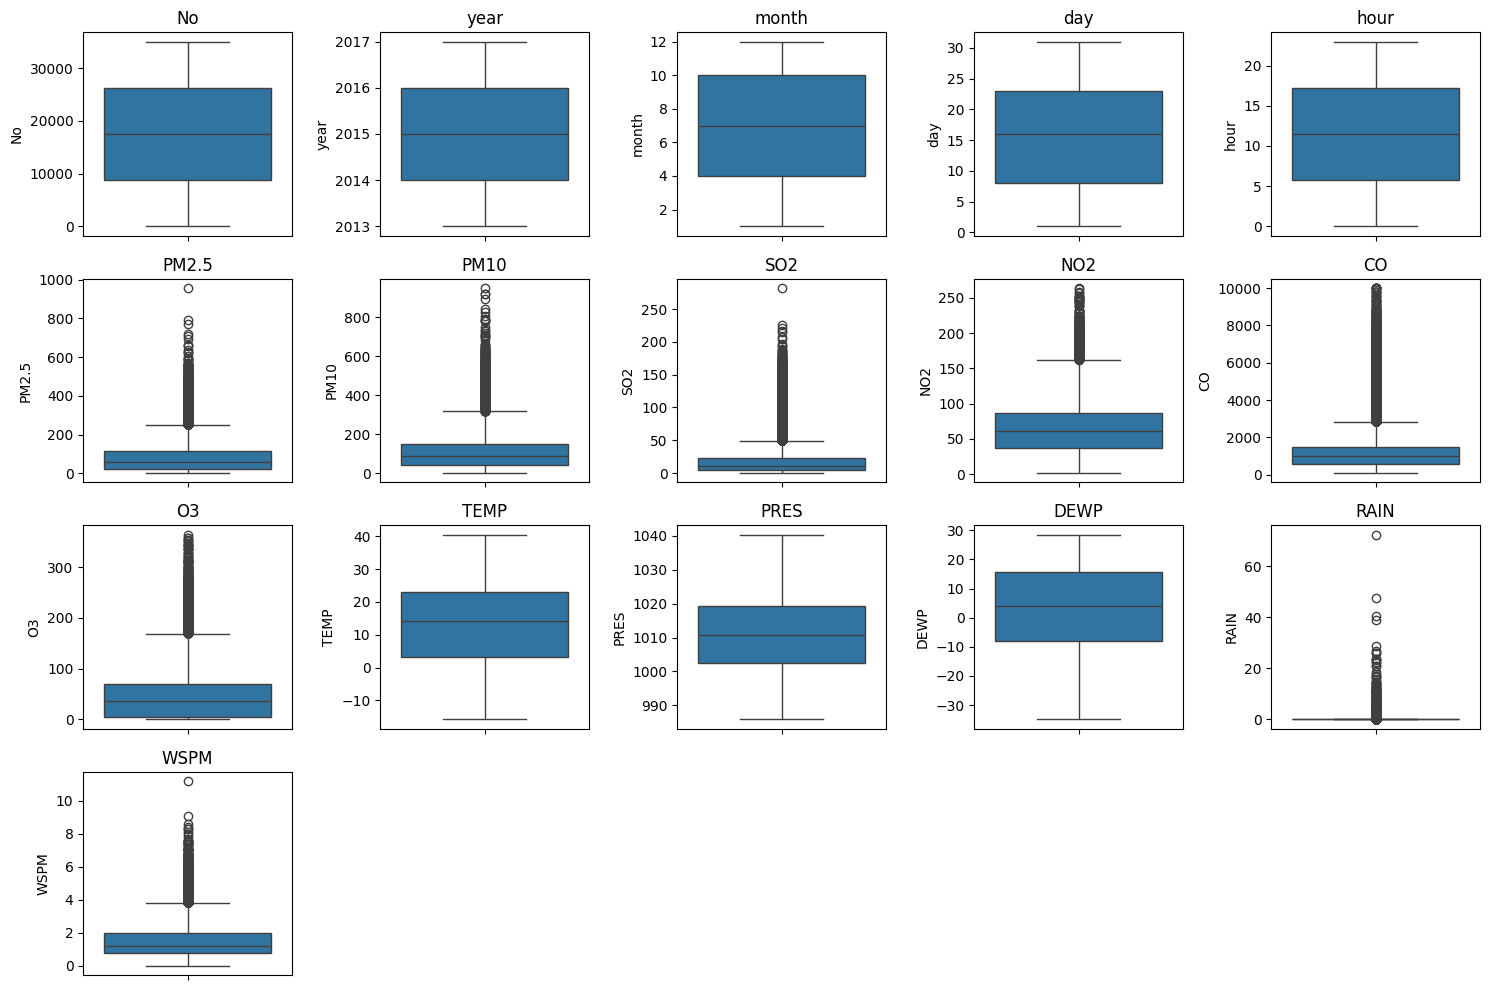

In [91]:
numerical_columns = data_wanliu.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_wanliu[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

### Data Wanshouxigong

**Gathering Data**

In [92]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [93]:
data_wanshouxigong = pd.read_csv("/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
print("Data Wanshouxigong:")
print(data_wanshouxigong)

Data Wanshouxigong:
          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station
0          1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong
1          2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong
2          3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong
3          4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong
4          5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong
...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...   ...   ...     ...   ...   ...  ...   ...            ...
35059  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0  12.5  1013.5 -16.2   0.

**Insight:**

Dataset ini berisi data kualitas udara dari berbagai stasiun pemantauan di Beijing yang dikumpulkan antara 1 Maret 2013 hingga 28 Februari 2017. Data terdiri dari 35064 baris dan 18 kolom yang mencakup parameter polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) serta faktor meteorologi (suhu, tekanan udara, kelembaban, kecepatan angin, arah angin, dan curah hujan).
*   No: Nomor indeks untuk setiap baris data
*   year: Tahun pencatatan data
*   month: Bulan pencatatan data
*   day: Hari pencatatan data
*   hour: Jam pencatatan data
*   PM2.5: Konsentrasi partikulat halus berukuran kurang lebih 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   PM10: Konsentrasi partikulat halus berukuran lebih dari 2.5 mikrometer yang bisa masuk ke paru-paru dan aliran darah
*   SO2: Sulfur Dioksida adalah gas yang dihasilkan dari pembakaran bahan bakar fosil (misalnya, batu bara, minyak)
*   NO2: Nitrogen Dioksida adalah gas yang dihasilkan dari emisi kendaraan dan pembakaran industri
*   CO2: Karbon Monoksida adalah gas beracun tanpa warna dan bau yang berasal dari pembakaran tidak sempurna bahan bakar
*   O3: Ozon yang terbentuk di permukaan bumi akibat rekasi kimia anatara sinar matahari dan polutan seperti NO2 dan VOCs (Volatile Organic Compounds)
*   TEMP: Suhu udara
*   PRES: Tekanan udara
*   DEWP: Titik embun
*   RAIN: Curah hujan
*   dd: Arah angin
*   WSPM: Kecepatan angin
*   Station: Nama stasiun pemantauan kualitas udara yang merekam data ini

**Assessing Data**

In [94]:
data_wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [95]:
data_wanshouxigong.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [96]:
data_wanshouxigong.duplicated().sum()

np.int64(0)

In [97]:
data_wanshouxigong.describe()

No          year         month           day          hour         PM2.5          PM10           SO2          NO2            CO            O3          TEMP          PRES          DEWP          RAIN          WSPM
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000  35051.000000
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000     85.024136    112.223459     17.148603     55.52956   1370.395031     56.229904     13.784477   1011.511804      2.707442      0.064320      1.745314
std    10122.249256      1.177213      3.448752      8.800218      6.922285     85.975981     97.593210     23.940834     35.80805   1223.139114     57.082710     11.385156     10.570928     13.704139      0.796981      1.206355
min        1.000000   2013.000000      1.000000      1.000000      0.000000      3.000000      2.000000      0.285600      2.00000    100.000000      0.214200    -16.800000    985.100000    -35.300000      0.000000      0.000000
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000     23.000000     39.000000      3.000000     28.00000    600.000000      8.000000      3.400000   1002.800000     -8.500000      0.000000      0.900000
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000     60.000000     91.000000      8.000000     49.00000   1000.000000     42.000000     14.800000   1011.000000      3.300000      0.000000      1.400000
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000    116.000000    154.000000     21.000000     77.00000   1700.000000     82.000000     23.500000   1020.000000     15.200000      0.000000      2.300000
max    35064.000000   2017.000000     12.000000     31.000000     23.000000    999.000000    961.000000    411.000000    251.00000   9800.000000    358.000000     40.600000   1042.000000     28.500000     46.400000     13.200000

**Insight:**

- Tidak ada data yang duplikat
- Ditemukan banyak missing value pada fitur PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Tipe data di setiap kolom sudah sesuai
- Tidak ada nilai yang tidak sesuai di setiap data




**Cleaning Data**

In [98]:
data_wanshouxigong['PM2.5'] = data_wanshouxigong['PM2.5'].fillna(data_wanshouxigong['PM2.5'].mean())
data_wanshouxigong['PM10'] = data_wanshouxigong['PM10'].fillna(data_wanshouxigong['PM10'].mean())
data_wanshouxigong['SO2'] = data_wanshouxigong['SO2'].fillna(data_wanshouxigong['SO2'].mean())
data_wanshouxigong['NO2'] = data_wanshouxigong['NO2'].fillna(data_wanshouxigong['NO2'].mean())
data_wanshouxigong['CO'] = data_wanshouxigong['CO'].fillna(data_wanshouxigong['CO'].mean())
data_wanshouxigong['O3'] = data_wanshouxigong['O3'].fillna(data_wanshouxigong['O3'].mean())
data_wanshouxigong['TEMP'] = data_wanshouxigong['TEMP'].fillna(data_wanshouxigong['TEMP'].mean())
data_wanshouxigong['PRES'] = data_wanshouxigong['PRES'].fillna(data_wanshouxigong['PRES'].mean())
data_wanshouxigong['DEWP'] = data_wanshouxigong['DEWP'].fillna(data_wanshouxigong['DEWP'].mean())
data_wanshouxigong['RAIN'] = data_wanshouxigong['RAIN'].fillna(data_wanshouxigong['RAIN'].mean())
data_wanshouxigong['wd'] = data_wanshouxigong['wd'].fillna(data_wanshouxigong['wd'].mode()[0])
data_wanshouxigong['WSPM'] = data_wanshouxigong['WSPM'].fillna(data_wanshouxigong['WSPM'].mean())

In [99]:
data_wanshouxigong.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Dalam menangani missing value, saya menggunakan pendekatan imputasi dengan menggantikan nilai yang hilang menggunakan nilai mean dari setiap fitur yang bersangkutan. Metode ini dilakukan dengan menghitung rata-rata dari nilai yang tersedia dalam setiap fitur, kemudian menggantikan missing value dengan nilai tersebut. Pendekatan ini dipilih karena dapat mengurangi dampak hilangnya informasi akibat missing value.

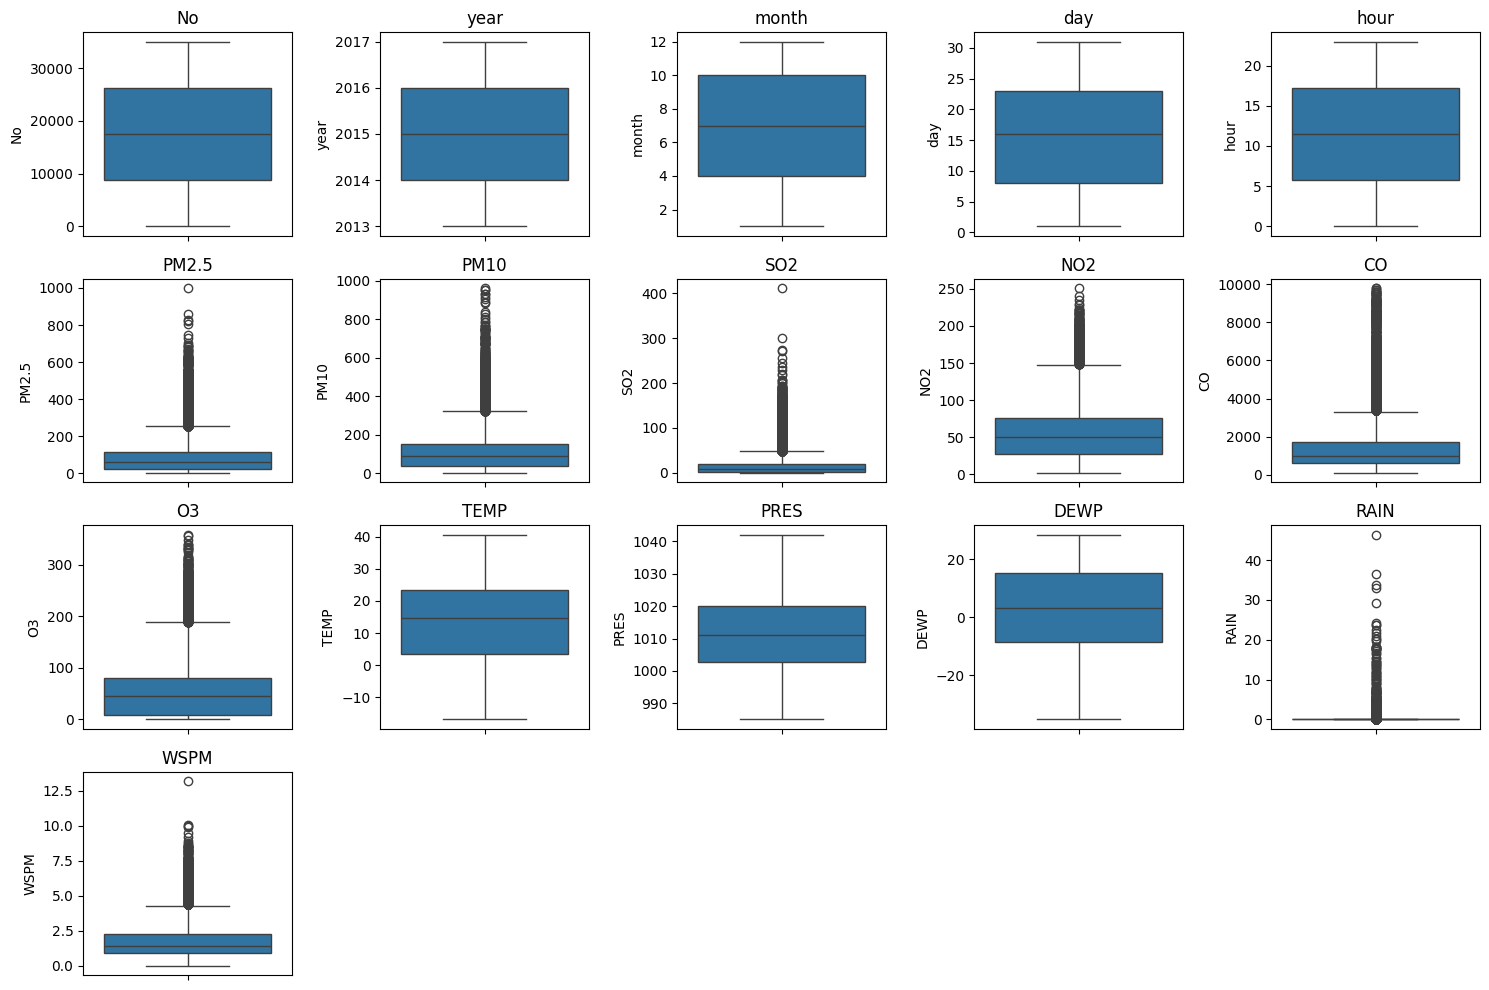

In [100]:
numerical_columns = data_wanshouxigong.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data_wanshouxigong[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas dapat diketahui bahwa fitur PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM memiliki banyak outlier

## Exploratory Data Analysis (EDA)

### Membuat dataframe baru yang berisi semua data dari seluruh station

In [101]:
data_all_stations = pd.concat([data_aotizhongxin, data_changping, data_dingling, data_dongsi, data_gucheng, data_huairou, data_nongzhanguan, data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong], ignore_index=True)

In [102]:
print(data_all_stations)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...     ...   ...   ...  ...   ...            ...
385699  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0  12.5  1013.5 -16.2   0.0   

Semua data dari station sudah digabung menjadi satu dan menghasilkan 385704 baris dan 18 kolom

In [103]:
data_all_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385704 entries, 0 to 385703
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       385704 non-null  int64  
 1   year     385704 non-null  int64  
 2   month    385704 non-null  int64  
 3   day      385704 non-null  int64  
 4   hour     385704 non-null  int64  
 5   PM2.5    385704 non-null  float64
 6   PM10     385704 non-null  float64
 7   SO2      385704 non-null  float64
 8   NO2      385704 non-null  float64
 9   CO       385704 non-null  float64
 10  O3       385704 non-null  float64
 11  TEMP     385704 non-null  float64
 12  PRES     385704 non-null  float64
 13  DEWP     385704 non-null  float64
 14  RAIN     385704 non-null  float64
 15  wd       385704 non-null  object 
 16  WSPM     385704 non-null  float64
 17  station  385704 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 53.0+ MB


In [104]:
data_all_stations.describe()

No           year          month            day           hour          PM2.5           PM10            SO2            NO2             CO             O3           TEMP           PRES           DEWP           RAIN           WSPM
count  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000  385704.000000
mean    17532.500000    2014.662560       6.522930      15.729637      11.500000      79.493587     104.174479      15.659751      49.918017    1226.927882      57.490525      13.534778    1010.646288       2.433162       0.064207       1.731629
std     10122.118037       1.177198       3.448708       8.800103       6.922196      79.957260      91.070273      21.219687      34.587848    1131.290453      55.701229      11.433909      10.469872      13.795090       0.812032       1.249664
min         1.000000    2013.000000       1.000000       1.000000       0.000000       2.000000       2.000000       0.285600       1.026500     100.000000       0.214200     -19.900000     982.400000     -43.400000       0.000000       0.000000
25%      8766.750000    2014.000000       4.000000       8.000000       5.750000      21.000000      36.000000       3.000000      23.000000     500.000000      12.000000       3.100000    1002.200000      -9.000000       0.000000       0.900000
50%     17532.500000    2015.000000       7.000000      16.000000      11.500000      56.000000      83.000000       8.000000      43.000000     900.000000      47.766600      14.500000    1010.300000       3.000000       0.000000       1.400000
75%     26298.250000    2016.000000      10.000000      23.000000      17.250000     109.000000     144.000000      19.000000      69.000000    1500.000000      80.000000      23.200000    1019.000000      15.100000       0.000000       2.200000
max     35064.000000    2017.000000      12.000000      31.000000      23.000000     999.000000     999.000000     500.000000     290.000000   10000.000000    1071.000000      41.600000    1042.800000      29.100000      72.500000      13.200000

In [105]:
data_all_stations.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

### Menambahkan Kolom Hari Pada Dataset

In [106]:
data_all_stations['date'] = pd.to_datetime(data_all_stations[['year', 'month', 'day', 'hour']])
data_all_stations['day_type'] = data_all_stations['date'].dt.dayofweek.map(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [107]:
print(data_all_stations)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station                date day_type
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   0.0  NNW   4.4   Aotizhongxin 2013-03-01 00:00:00  Weekday
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   0.0    N   4.7   Aotizhongxin 2013-03-01 01:00:00  Weekday
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   0.0  NNW   5.6   Aotizhongxin 2013-03-01 02:00:00  Weekday
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   0.0   NW   3.1   Aotizhongxin 2013-03-01 03:00:00  Weekday
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   0.0    N   2.0   Aotizhongxin 2013-03-01 04:00:00  Weekday
...       ...   ...    ...  ...   ...    ...   ...   ...  

In [108]:
data_all_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385704 entries, 0 to 385703
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        385704 non-null  int64         
 1   year      385704 non-null  int64         
 2   month     385704 non-null  int64         
 3   day       385704 non-null  int64         
 4   hour      385704 non-null  int64         
 5   PM2.5     385704 non-null  float64       
 6   PM10      385704 non-null  float64       
 7   SO2       385704 non-null  float64       
 8   NO2       385704 non-null  float64       
 9   CO        385704 non-null  float64       
 10  O3        385704 non-null  float64       
 11  TEMP      385704 non-null  float64       
 12  PRES      385704 non-null  float64       
 13  DEWP      385704 non-null  float64       
 14  RAIN      385704 non-null  float64       
 15  wd        385704 non-null  object        
 16  WSPM      385704 non-null  float64    

Penambahan kolom hari dilakukan untuk mengidentifikasi apakah hari tersebut termasuk weekday atau weekend.

### Distribusi Polutan

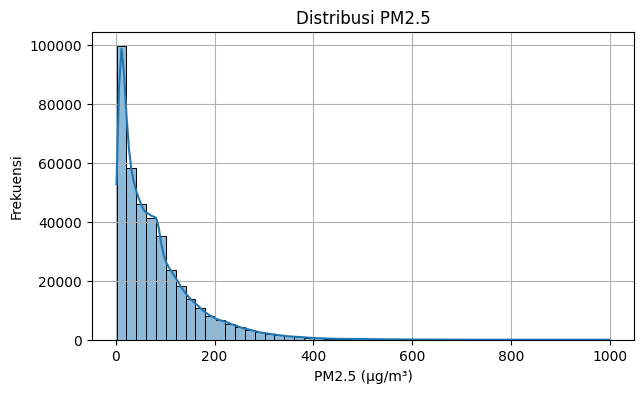

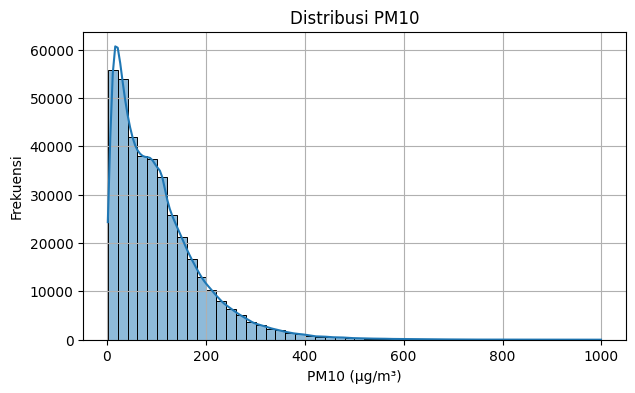

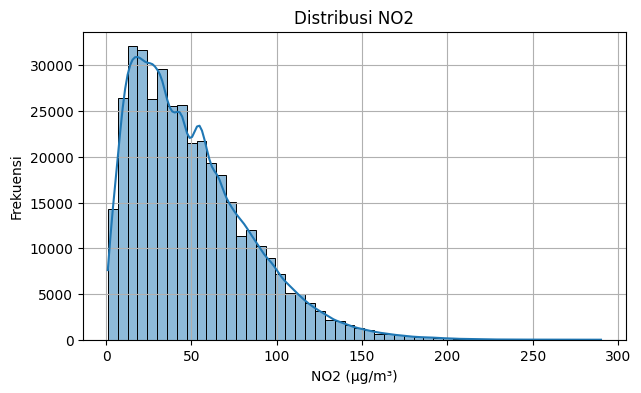

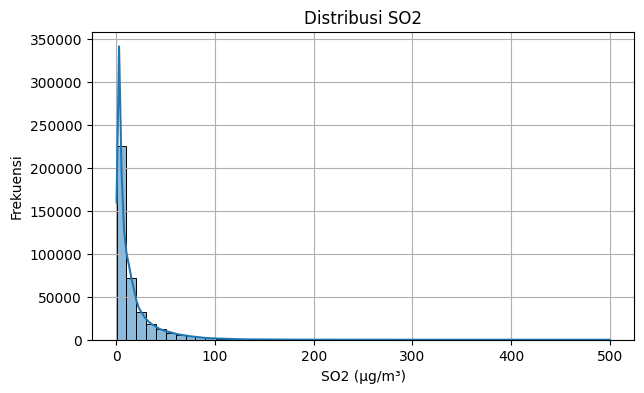

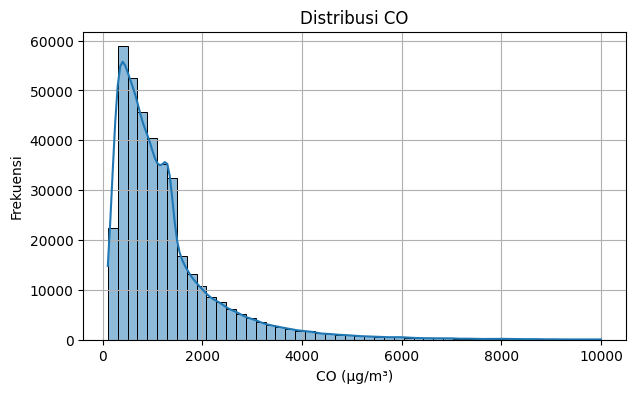

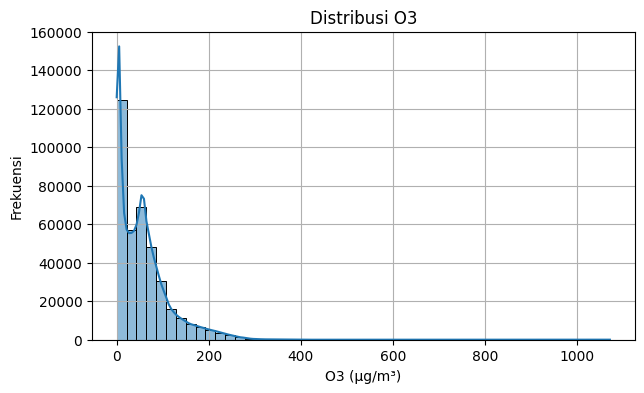

In [109]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
for p in pollutants:
  plt.figure(figsize=(7, 4))
  sns.histplot(data_all_stations[p], bins=50, kde=True)
  plt.title(f'Distribusi {p}')
  plt.xlabel(f'{p} (µg/m³)')
  plt.ylabel('Frekuensi')
  plt.grid(True)
  plt.show()
  print()

**PM2.5 & PM10**
- Mayoritas nilai PM2.5 dan PM10 terkonsentrasi di bawah 100 µg/m³.
- Distribusinya right-skewed (kemiringan ke kanan), artinya ada beberapa nilai ekstrem tinggi.
- Hal ini mengindikasikan kejadian polusi parah terjadi sesekali, bukan rutin.

**NO2**
- Pola distribusi mirip gamma, dengan puncak pada rentang 20–40 µg/m³.
- Menunjukkan bahwa tingkat NO2 cukup stabil.

**SO2**
- Hampir seluruh nilai SO2 berada di bawah 50 µg/m³.
- Distribusi sangat tajam dan sempit (kemungkinan polusi SO2 tidak terlalu parah, namun tetap perlu diperhatikan saat naik drastis).

**CO**
- Sebagian besar konsentrasi CO berada di bawah 2000 µg/m³, tetapi ada rentang panjang hingga 10.000 µg/m³.
- Hal ini bisa jadi akibat pembakaran tidak sempurna dari kendaraan atau industri pada waktu tertentu.

**O3**
- Distribusi menunjukkan dua puncak (bimodal), yaitu sekitar 20–40 µg/m³ dan 80–100 µg/m³.
- Ini bisa jadi menunjukkan pola musiman atau waktu harian tertentu (siang hari dengan sinar UV tinggi → O3 meningkat).

### Rata-Rata Polutan Per Stasiun

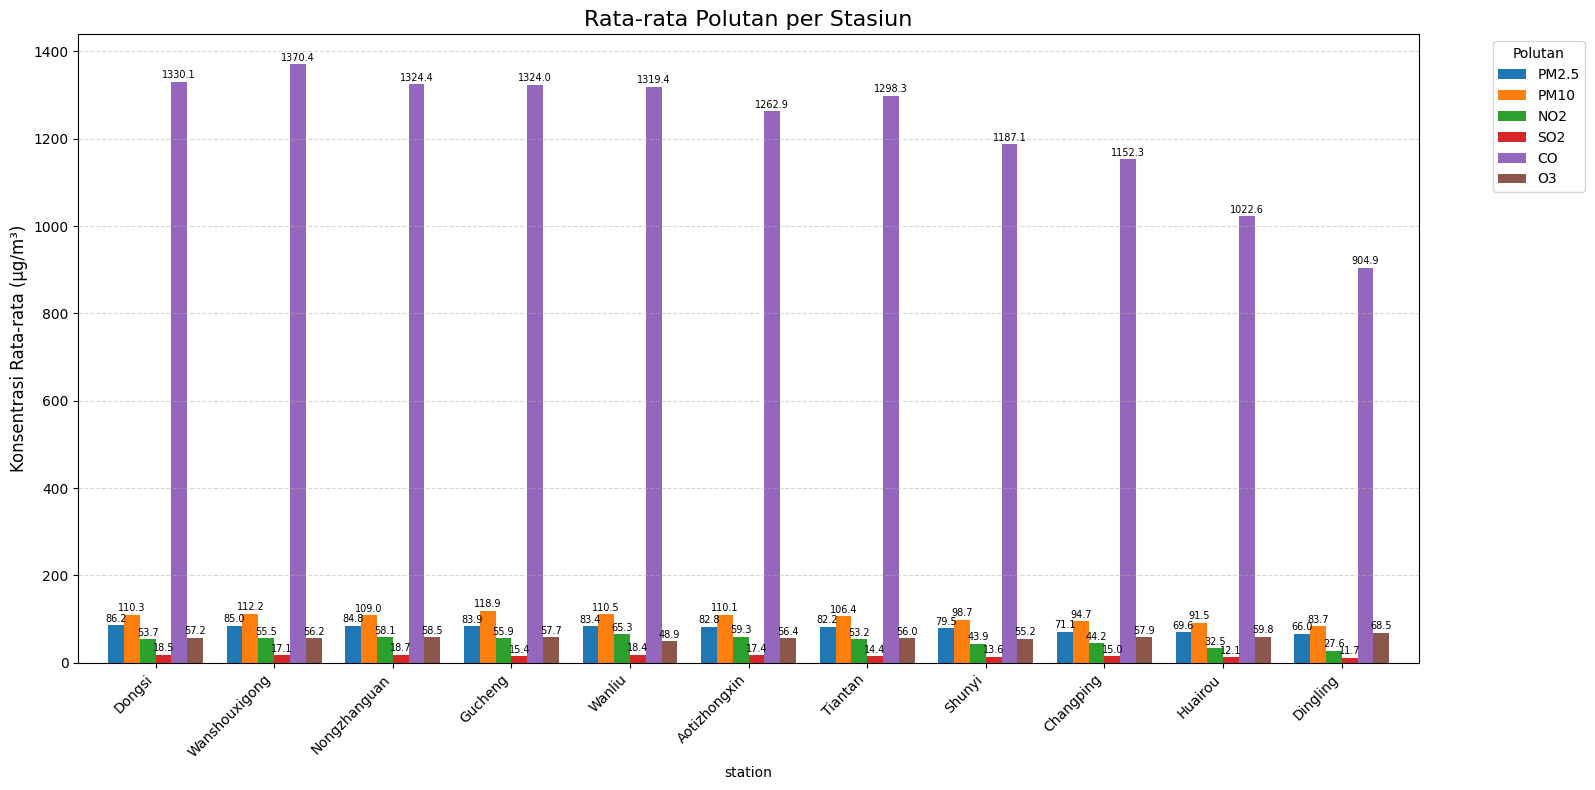

In [110]:
station_avg = data_all_stations.groupby('station')[pollutants].mean().sort_values(by='PM2.5', ascending=False)

fig, ax = plt.subplots(figsize=(16, 8))
station_avg.plot(kind='bar', ax=ax, width=0.8)

plt.title('Rata-rata Polutan per Stasiun', fontsize=16)
plt.ylabel('Konsentrasi Rata-rata (µg/m³)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Polutan', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=7, padding=1)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- Dingling adalah stasiun paling bersih secara umum, dengan konsentrasi rendah pada hampir semua jenis polutan (kecuali O3).
- Wanshouxigong, Dongsi, dan Nongzhanguan menunjukkan kualitas udara yang buruk dan memerlukan perhatian lebih.


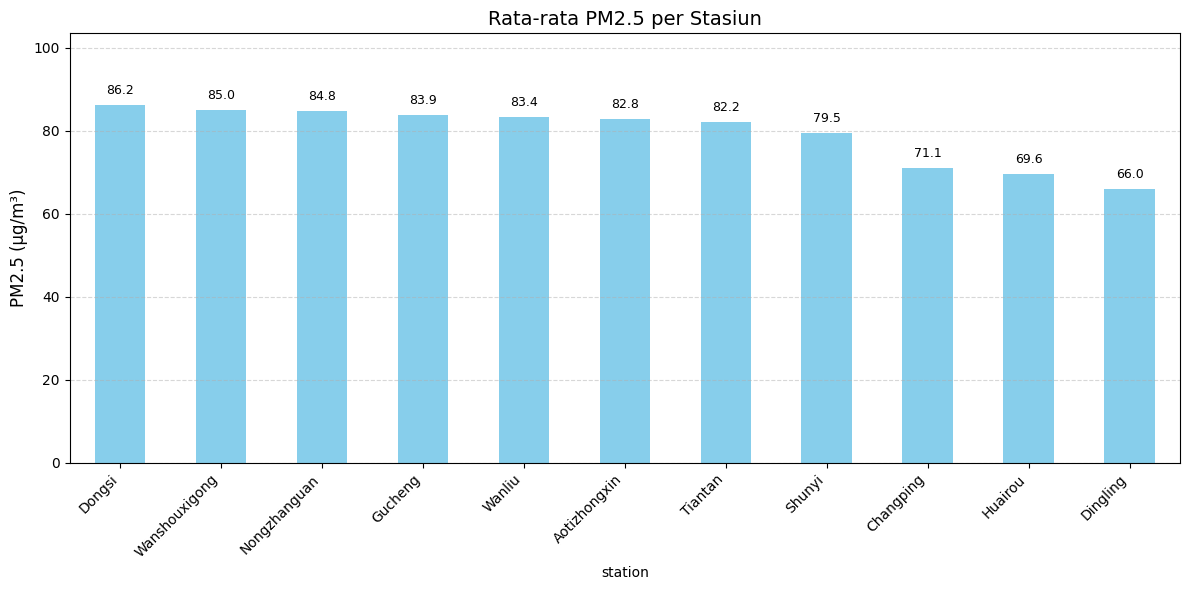

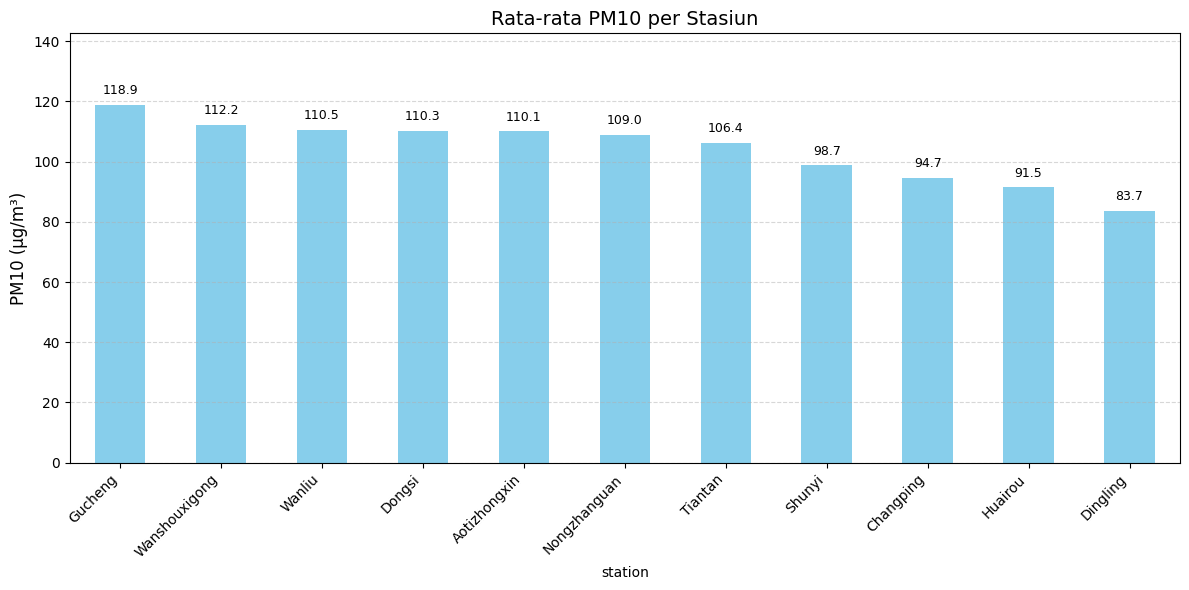

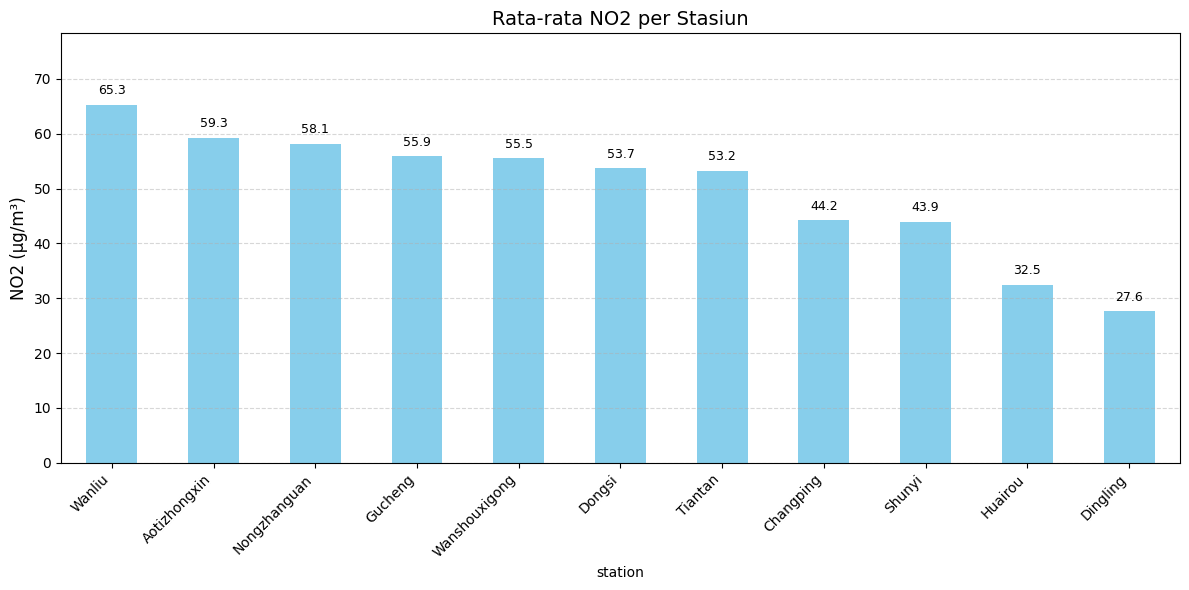

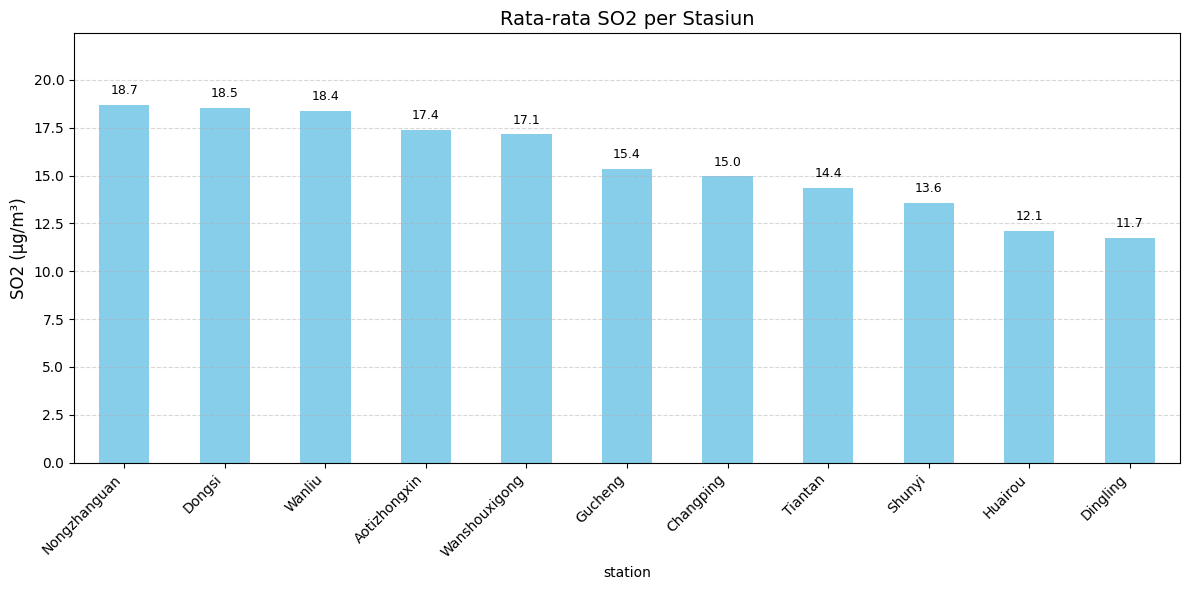

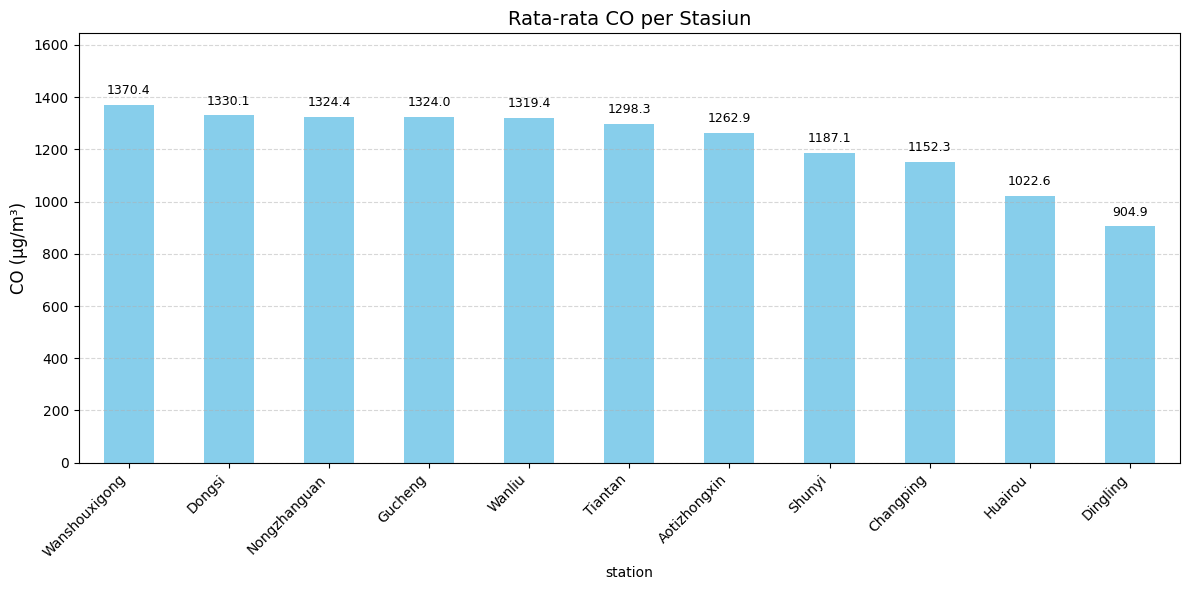

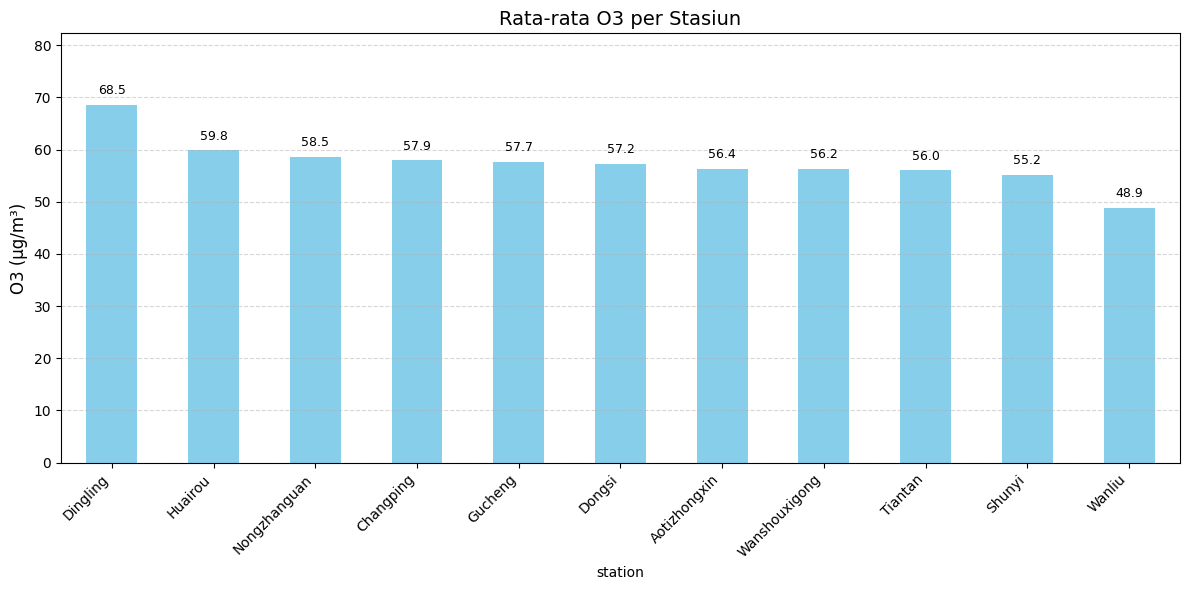

In [111]:
station_avg = data_all_stations.groupby('station')[pollutants].mean()

for pol in pollutants:
    plt.figure(figsize=(12, 6))
    ax = station_avg[pol].sort_values(ascending=False).plot(kind='bar', color='skyblue')

    plt.title(f'Rata-rata {pol} per Stasiun', fontsize=14)
    plt.ylabel(f'{pol} (µg/m³)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, station_avg[pol].max() * 1.2)

    for i, value in enumerate(station_avg[pol].sort_values(ascending=False)):
        ax.text(i, value + (station_avg[pol].max() * 0.03), f'{value:.1f}',
                ha='center', fontsize=9, rotation=0)

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print()


**PM10**
- Gucheng memiliki rata-rata PM10 tertinggi (~118.9 µg/m³).
- Dingling memiliki rata-rata PM10 terendah (~66.3 µg/m³).

**PM2.5**
- PM2.5 relatif tinggi di Dongsi dan Wanshouxigong.
- Paling rendah di Dingling dan Huairou.

**NO2**
- Wanliu memiliki NO2 tertinggi (~57.7 µg/m³).
- Dingling paling rendah (~27.6 µg/m³).

**SO2**
- Konsentrasi SO2 cukup rendah secara keseluruhan.
- Tertinggi di Changping (~15.0 µg/m³), terendah di Dingling (~1.7 µg/m³).

**CO**
- CO sangat mendominasi total konsentrasi karena satuan µg/m³ yang besar.
- Tertinggi di Wanshouxigong, terendah di Dingling.

**O3**
- Dingling memiliki konsentrasi O3 tertinggi (~68.5 µg/m³).
- Paling rendah di Shunyi (~43.9 µg/m³).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana perbedaan rata-rata konsentrasi polutan (PM2.5, PM10, NO2, SO2, CO, O3) antara hari kerja dan akhir pekan di masing-masing stasiun pemantauan?

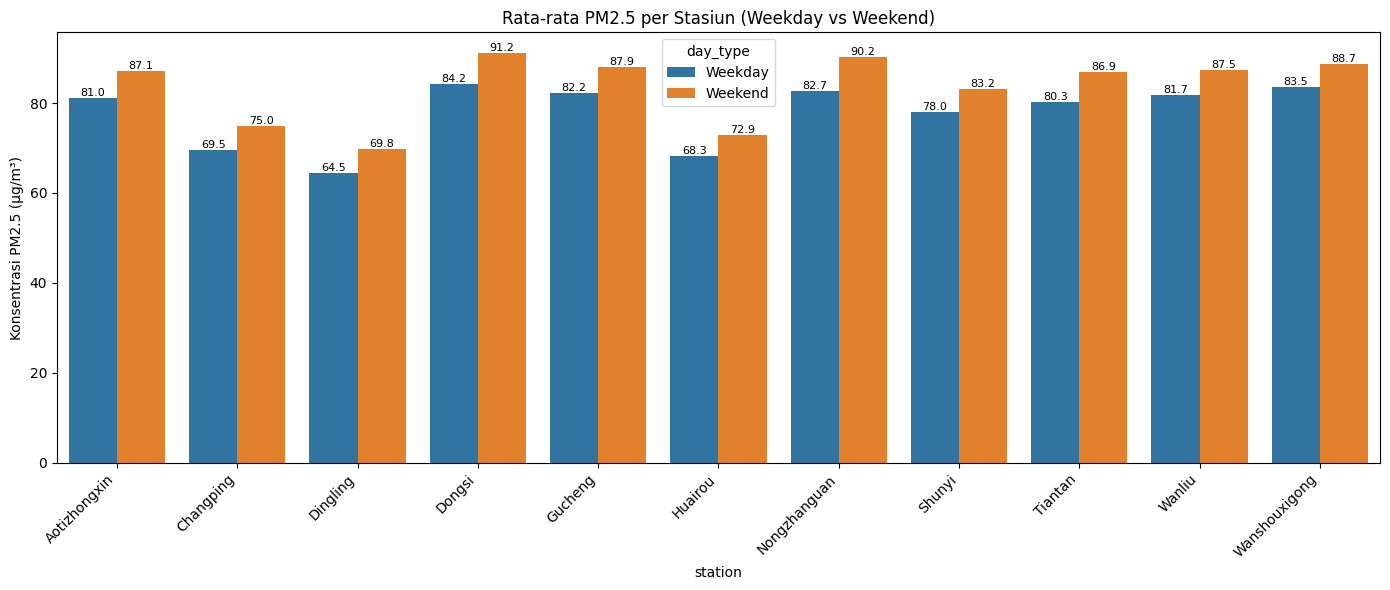

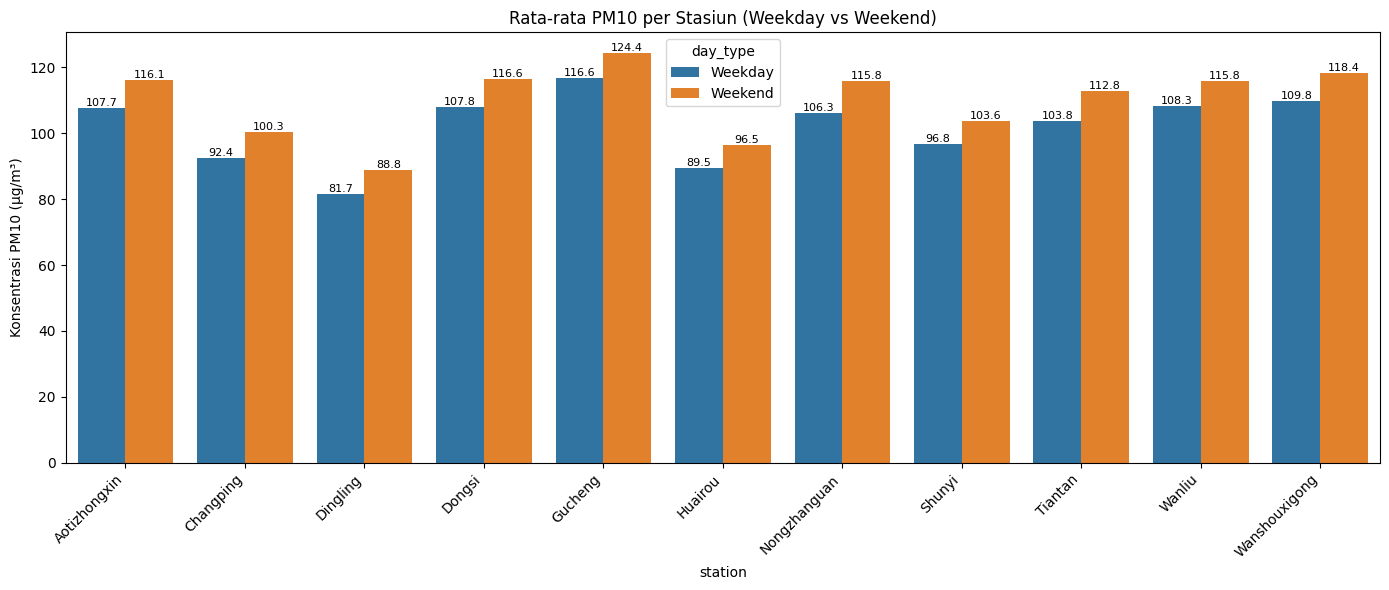

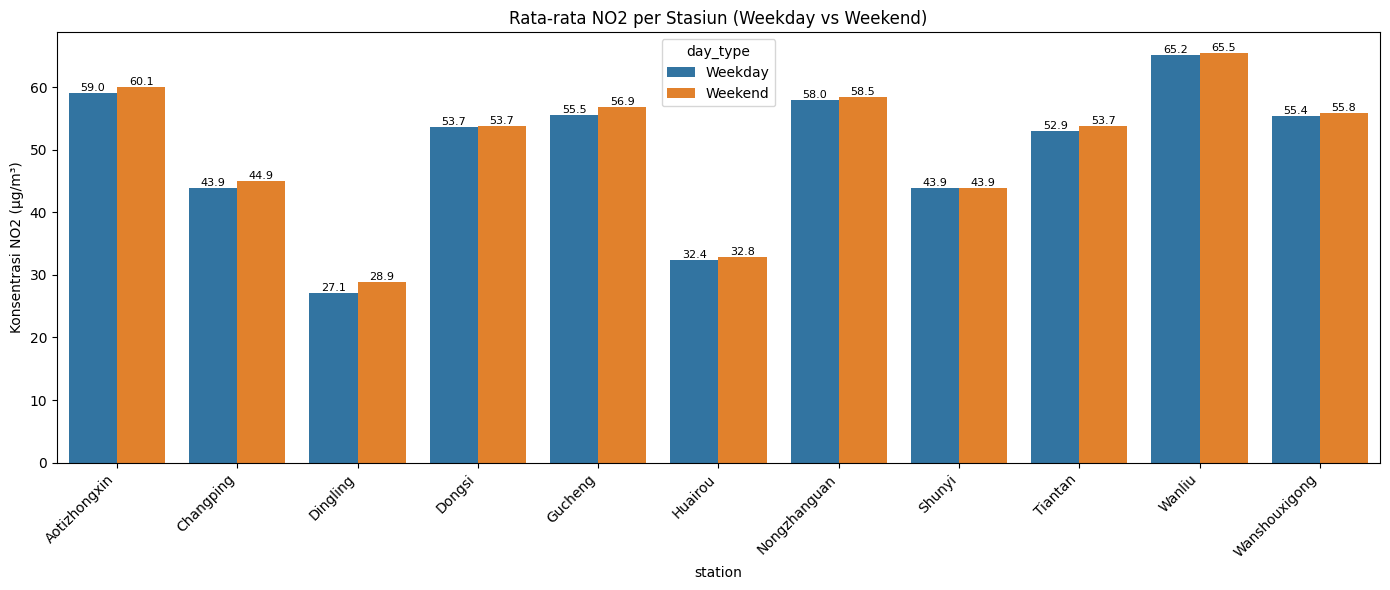

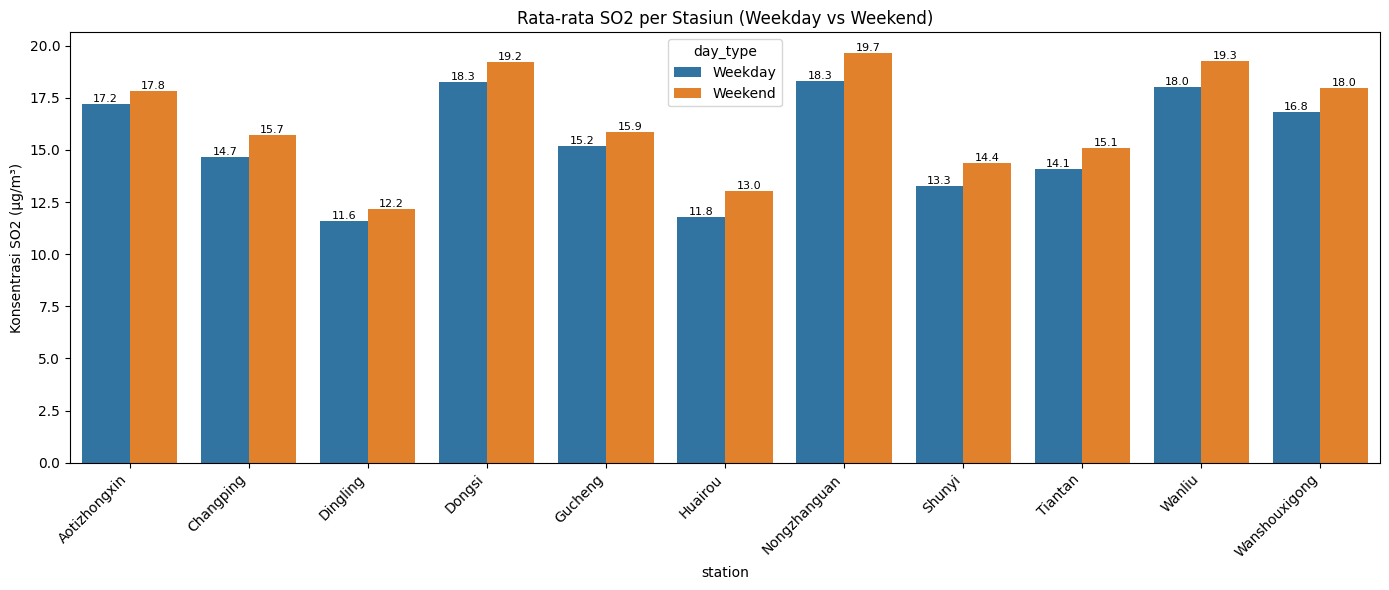

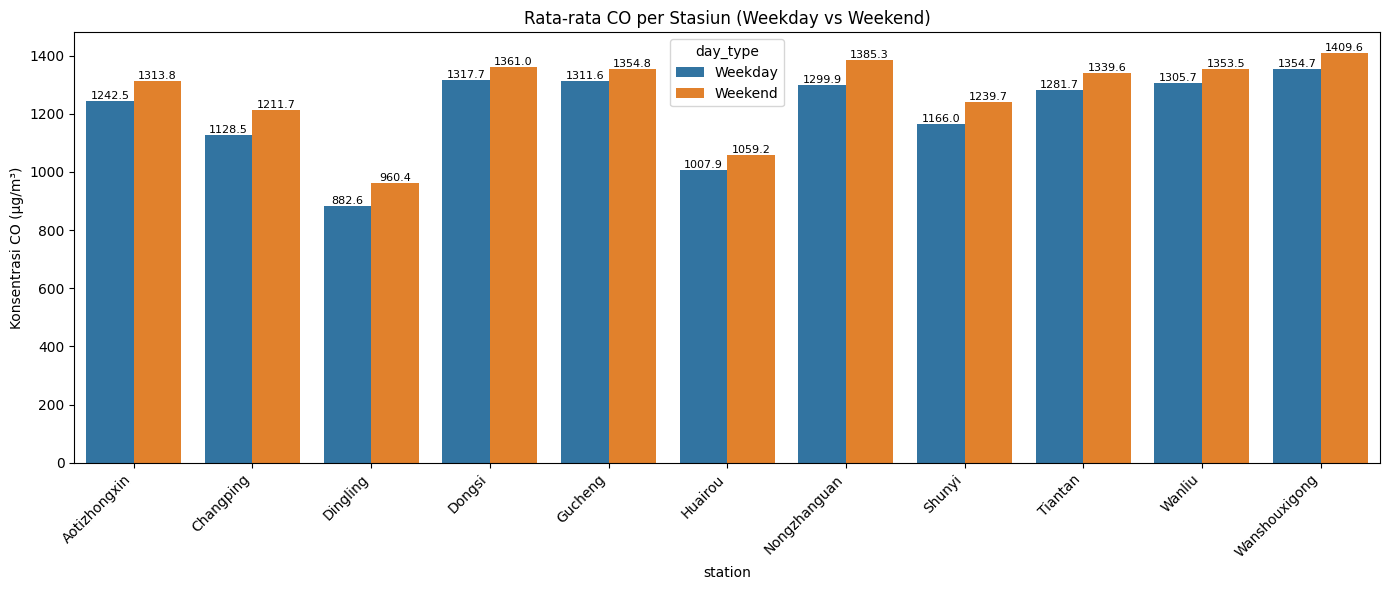

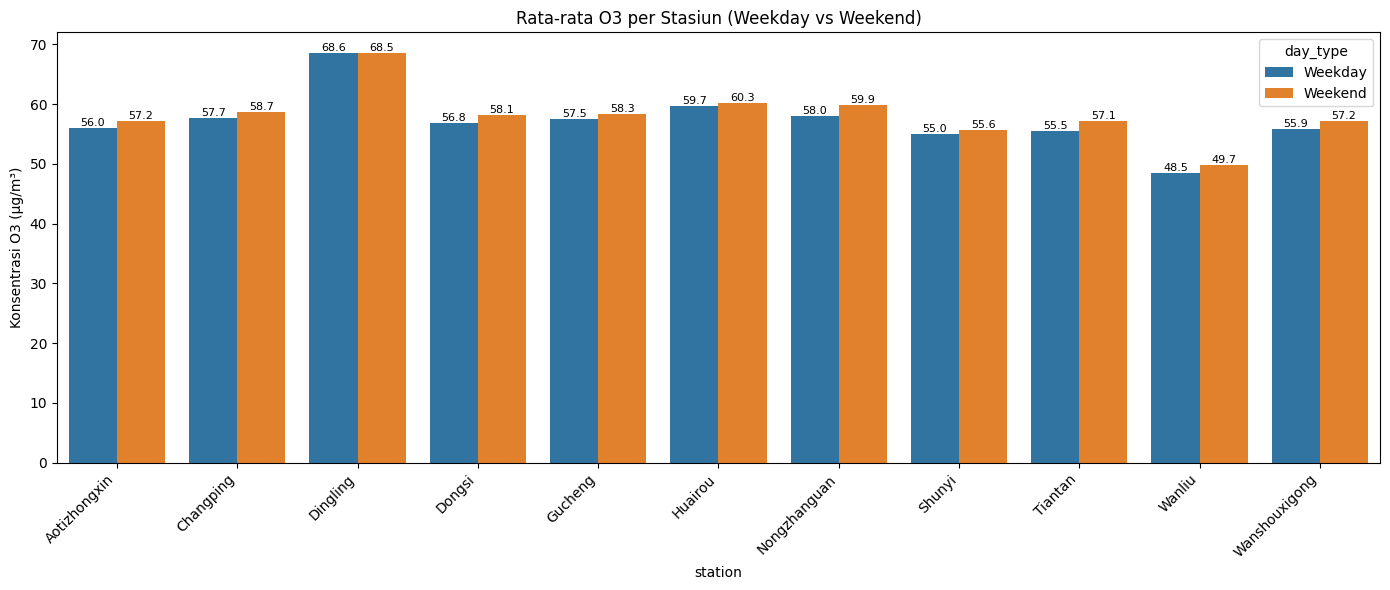

In [112]:
weekday_avg = data_all_stations.groupby(['station', 'day_type'])[pollutants].mean().reset_index()

for pol in pollutants:
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(data=weekday_avg, x='station', y=pol, hue='day_type')
    plt.title(f'Rata-rata {pol} per Stasiun (Weekday vs Weekend)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'Konsentrasi {pol} (µg/m³)')
    plt.tight_layout()

    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f', label_type='edge', fontsize=8)

    plt.show()
    print()

- Dongsi Station memiliki rata-rata PM2.5 tertinggi baik saat weekday maupun weekend.
- Dingling Station memiliki rata-rata PM2.5 terendah pada kedua jenis hari tersebut.
- Gucheng Station menunjukkan rata-rata PM10 tertinggi saat weekday dan weekend.
- Dingling Station kembali menjadi stasiun dengan rata-rata PM10 terendah.
- Wanliu Station memiliki rata-rata NO2 tertinggi di weekday dan weekend.
- Dingling Station mencatatkan rata-rata NO2 terendah di kedua hari.
- Saat weekday, stasiun dengan rata-rata SO2 tertinggi adalah Dongsi dan Nongzhanguan Station. Saat weekend, Nongzhanguan Station tetap menjadi yang tertinggi.
- Dingling Station konsisten memiliki rata-rata SO2 terendah baik weekday maupun weekend.
- Wanshouxigong Station memiliki rata-rata CO tertinggi pada weekday dan weekend.
- Dingling Station mencatatkan rata-rata CO terendah di kedua periode.
- Dingling Station justru menjadi stasiun dengan rata-rata O3 tertinggi saat weekday dan weekend.
- Sebaliknya, Wanliu Station memiliki rata-rata O3 terendah di kedua jenis hari.

### Pertanyaan 2:

Bagaimana hubungan antara variabel cuaca (DEWP, TEMP, WSPM, wd) dengan tingkat polusi udara (PM2.5, PM10, NO2, SO2, CO, O3) di periode 2013-2017?

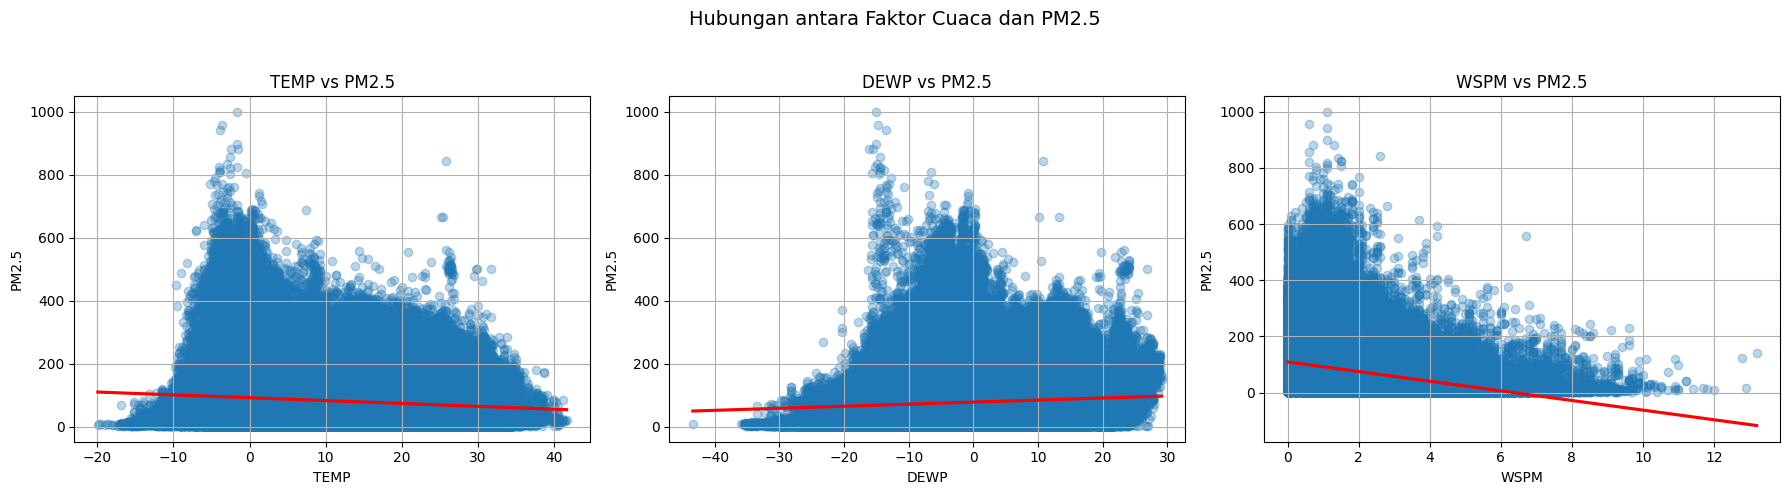

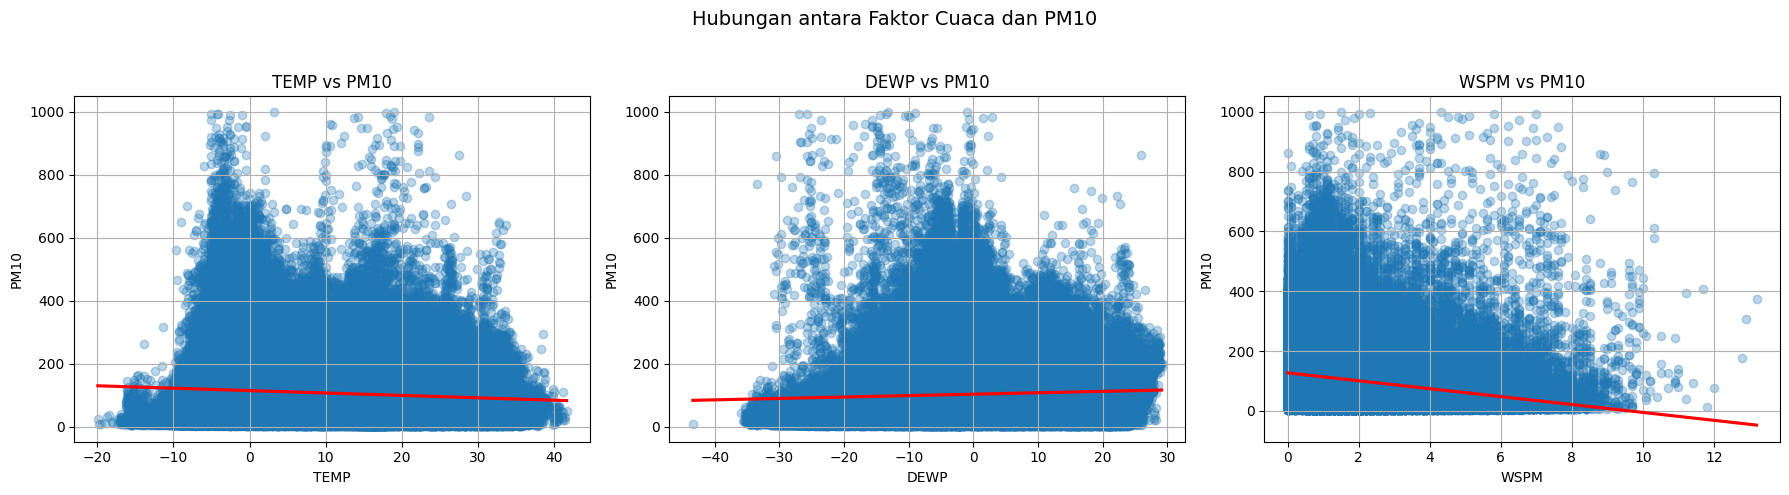

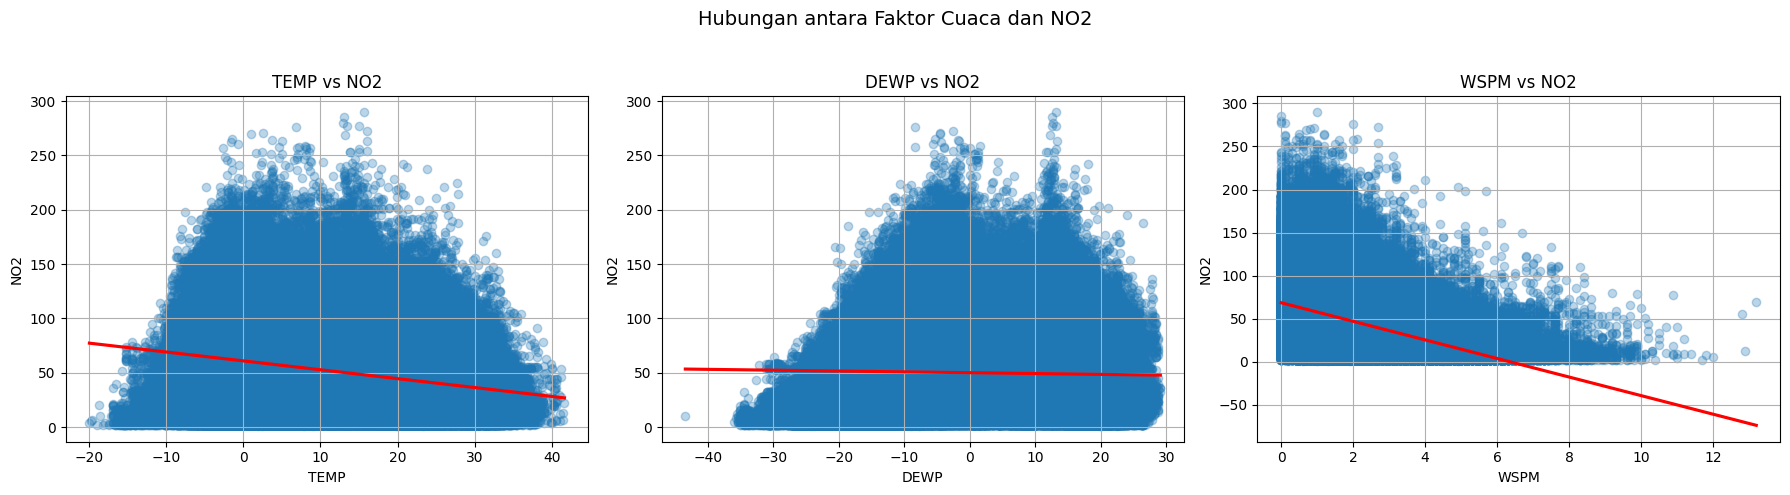

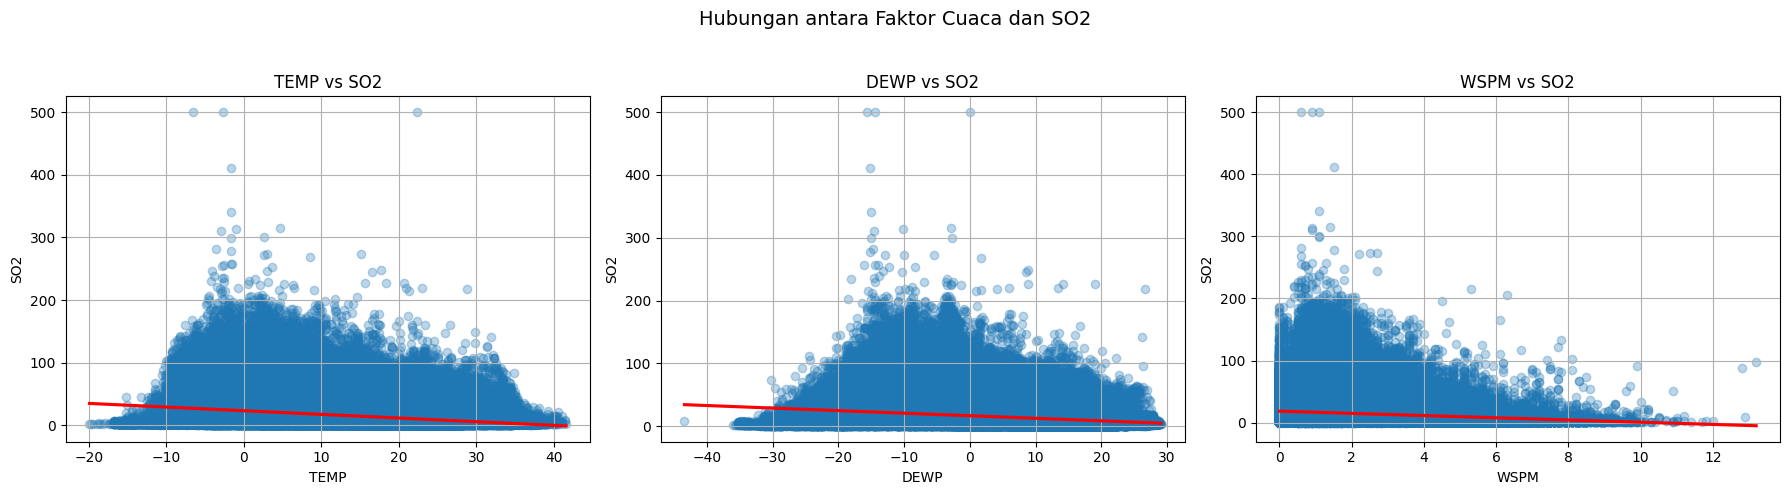

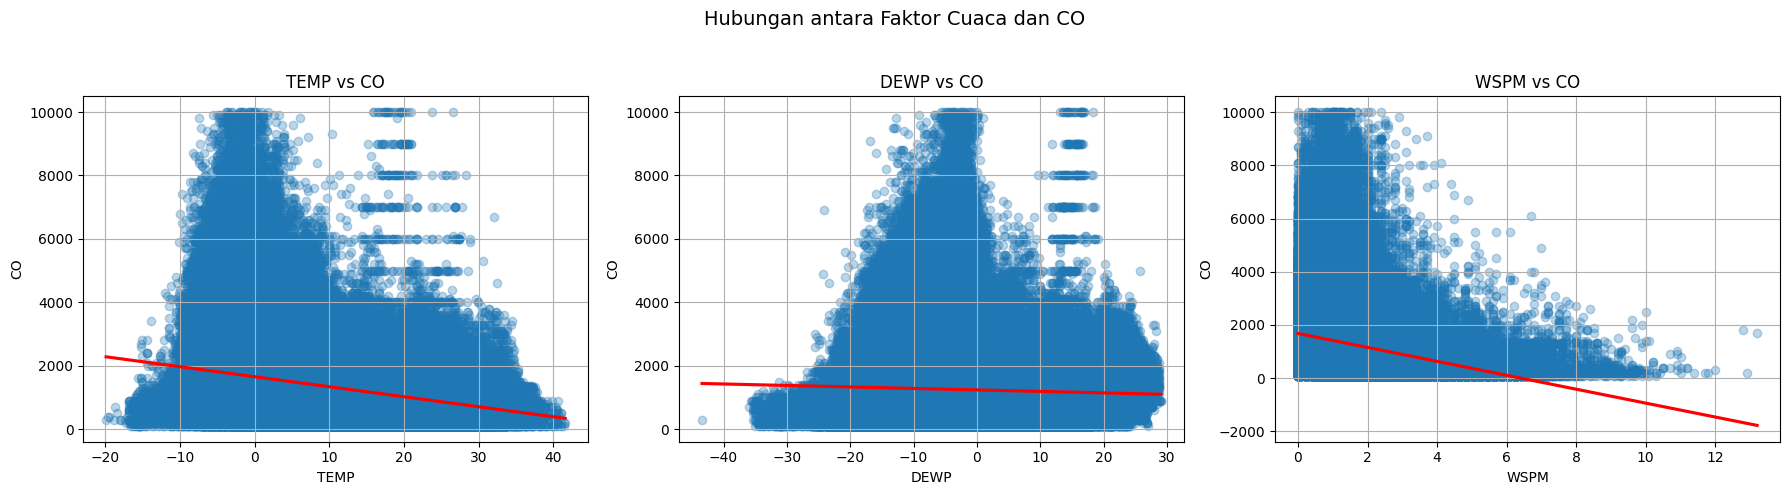

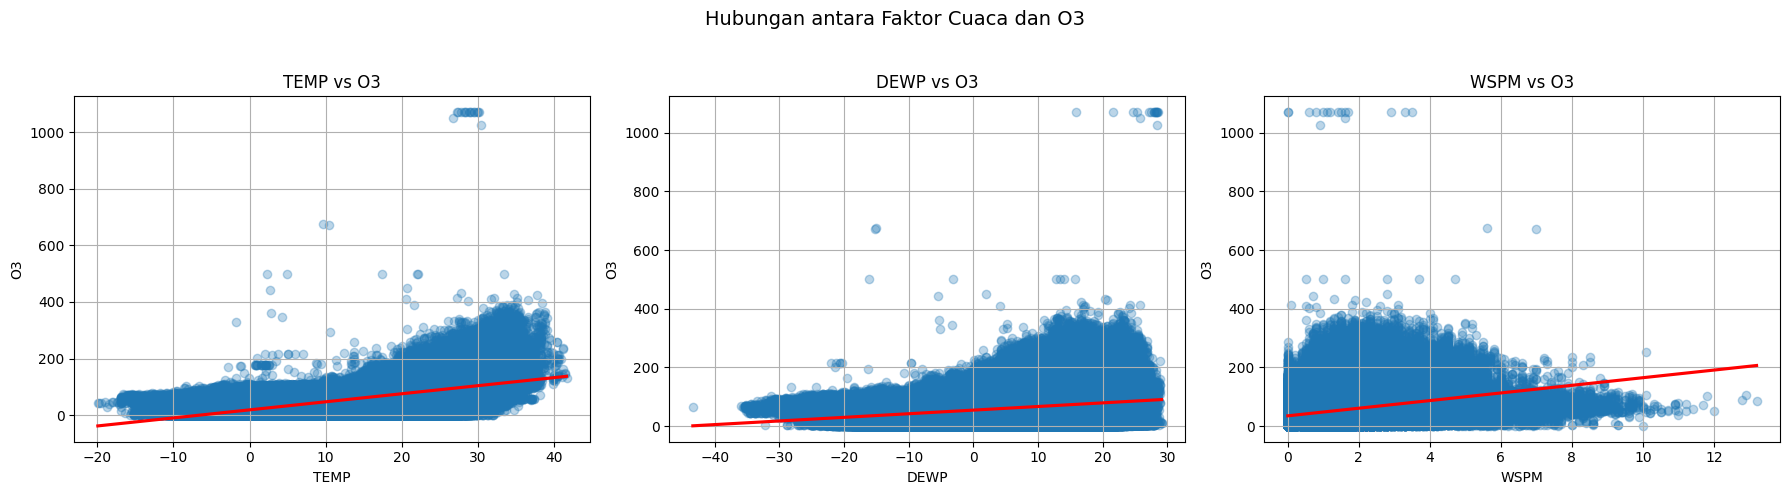

In [113]:
weather_vars = ['TEMP', 'DEWP', 'WSPM']

for pol in pollutants:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Hubungan antara Faktor Cuaca dan {pol}', fontsize=14)

    for i, weather in enumerate(weather_vars):
        sns.regplot(
            data=data_all_stations,
            x=weather, y=pol,
            ax=axes[i],
            scatter_kws={'alpha': 0.3},
            line_kws={'color': 'red'}
        )
        axes[i].set_title(f'{weather} vs {pol}')
        axes[i].set_xlabel(weather)
        axes[i].set_ylabel(pol)
        axes[i].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    print()


**PM2.5**
- Terdapat hubungan yang sangat lemah antara suhu udara (TEMP) dan kadar PM2.5, ditunjukkan oleh garis regresi yang hampir datar, sehingga dapat dikatakan tidak ada hubungan signifikan antara keduanya.
- Kelembaban udara (DEWP) menunjukkan korelasi yang sangat lemah positif terhadap PM2.5, artinya peningkatan kelembaban hanya sedikit sekali berpengaruh terhadap peningkatan kadar PM2.5.
- Kecepatan angin (WSPM) memiliki hubungan negatif dengan PM2.5, yang berarti semakin tinggi kecepatan angin, semakin rendah kadar PM2.5 di udara.

**PM10**
- Suhu udara (TEMP) menunjukkan hampir tidak ada korelasi terhadap PM10, sehingga perubahan suhu tidak memberikan pengaruh berarti terhadap konsentrasi PM10.
- Kelembaban (DEWP) memiliki korelasi sangat lemah positif terhadap PM10, mirip seperti pola yang terlihat pada PM2.5.
- Kecepatan angin (WSPM) menunjukkan korelasi negatif yang sedikit lebih kuat dibandingkan dengan PM2.5, menandakan bahwa angin lebih efektif dalam menyebarkan partikel PM10.

**NO2**
- Terdapat korelasi negatif lemah antara suhu udara (TEMP) dan kadar NO2, yang mengindikasikan bahwa peningkatan suhu sedikit menurunkan konsentrasi NO2.
- Kelembaban udara (DEWP) menunjukkan korelasi yang sangat lemah dan mendekati netral, sehingga pengaruhnya terhadap NO2 hampir tidak signifikan.
- Kecepatan angin (WSPM) memiliki korelasi negatif yang cukup kuat dengan NO2, menandakan bahwa angin sangat membantu dalam mengurangi konsentrasi NO2 di udara.

**SO2**
- Suhu udara (TEMP) hampir tidak menunjukkan korelasi terhadap kadar SO2, terlihat dari garis regresi yang sangat datar, sehingga bisa dikatakan hubungan keduanya netral.
- Kelembaban (DEWP) juga memperlihatkan hubungan yang netral hingga sangat lemah, sehingga tidak berpengaruh signifikan terhadap kadar SO2.
- Kecepatan angin (WSPM) memiliki korelasi negatif, artinya angin membantu menyebarkan gas SO2 dan menurunkan konsentrasinya di udara.

**CO**
- Terdapat korelasi negatif lemah hingga sedang antara suhu udara (TEMP) dan kadar CO, yang menunjukkan bahwa saat suhu meningkat, kadar CO cenderung menurun.
- Hubungan antara kelembaban (DEWP) dan CO adalah negatif lemah, menunjukkan penurunan kadar CO seiring meningkatnya kelembaban, meskipun tidak signifikan.
- Kecepatan angin (WSPM) memiliki korelasi negatif yang cukup kuat dengan CO, menunjukkan bahwa angin memainkan peran penting dalam menurunkan kadar CO di udara.

**O3**
- Suhu udara (TEMP) memiliki korelasi positif lemah terhadap kadar O3, artinya suhu yang lebih tinggi cenderung menyebabkan peningkatan kadar ozon di udara.
- Kelembaban (DEWP) menunjukkan korelasi positif, sehingga dapat disimpulkan bahwa kelembaban udara mungkin berperan dalam pembentukan atau akumulasi ozon.
- Kecepatan angin (WSPM) juga menunjukkan korelasi positif lemah, yang mengindikasikan bahwa peningkatan kecepatan angin sedikit berkaitan dengan peningkatan kadar O3.





- WSPM (kecepatan angin) memiliki pengaruh paling konsisten dan signifikan, umumnya negatif terhadap polutan.
- TEMP hanya punya pengaruh cukup jelas terhadap CO dan O3.
- DEWP (kelembaban) umumnya menunjukkan pengaruh yang sangat lemah, kecuali pada O3.
- Polutan paling responsif terhadap faktor cuaca: CO dan NO2.

### Pertanyaan 3:

Stasiun mana yang memiliki kualitas udara paling buruk secara konsisten, dan apa penyebab potensialnya?

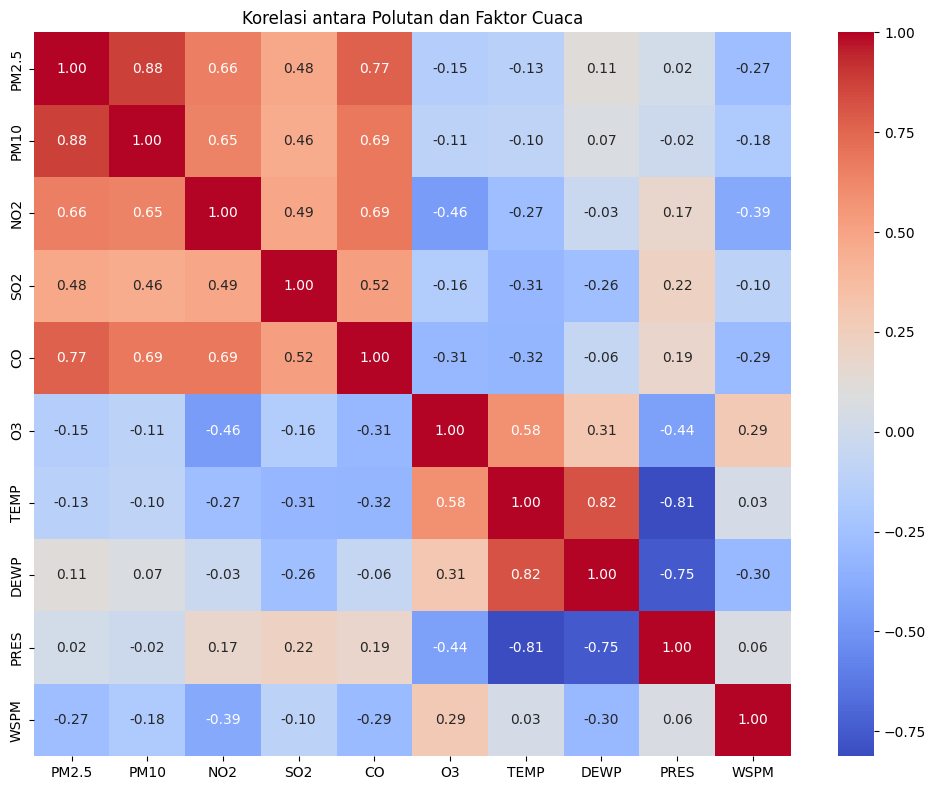

In [114]:
weather_vars = ['TEMP', 'DEWP', 'PRES', 'WSPM']
corr = data_all_stations[pollutants + weather_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Polutan dan Faktor Cuaca')
plt.tight_layout()
plt.show()


- PM2.5 dan PM10 sangat berkorelasi tinggi (0.88) → Menandakan keduanya cenderung meningkat atau menurun bersamaan.
- CO berkorelasi kuat dengan PM2.5 (0.77), PM10 (0.69), dan NO2 (0.69) → CO bisa menjadi indikator tambahan untuk pencemaran partikulat.
- NO2 berkorelasi sedang dengan PM2.5 dan PM10 (~0.65-0.66).
- SO2 memiliki korelasi lemah hingga sedang dengan polutan lainnya (maksimal 0.52 dengan CO).
- O3 berkorelasi positif sedang dengan suhu (0.58) → O3 cenderung meningkat saat suhu naik.
- Polutan lainnya justru berkorelasi negatif dengan suhu, terutama: CO (-0.32), SO2 (-0.31), NO2 (-0.27)
- TEMP dan DEWP memiliki korelasi sangat tinggi (0.82) → Semakin tinggi suhu, semakin tinggi titik embun.
- Korelasi DEWP dengan polutan rendah (sekitar -0.3 hingga 0.1) → Titik embun tidak terlalu memengaruhi polutan secara langsung.
- TEMP (-0.81) dan DEWP (-0.75) berkorelasi negatif kuat dengan tekanan udara.
- O3 memiliki korelasi negatif sedang dengan tekanan udara (-0.44) → O3 cenderung meningkat saat tekanan rendah.
- Korelasi negatif dengan hampir semua polutan, terutama: PM2.5 (-0.27), NO2 (-0.39), CO (-0.29). Artinya, angin membantu mengurangi konsentrasi polutan di udarra.

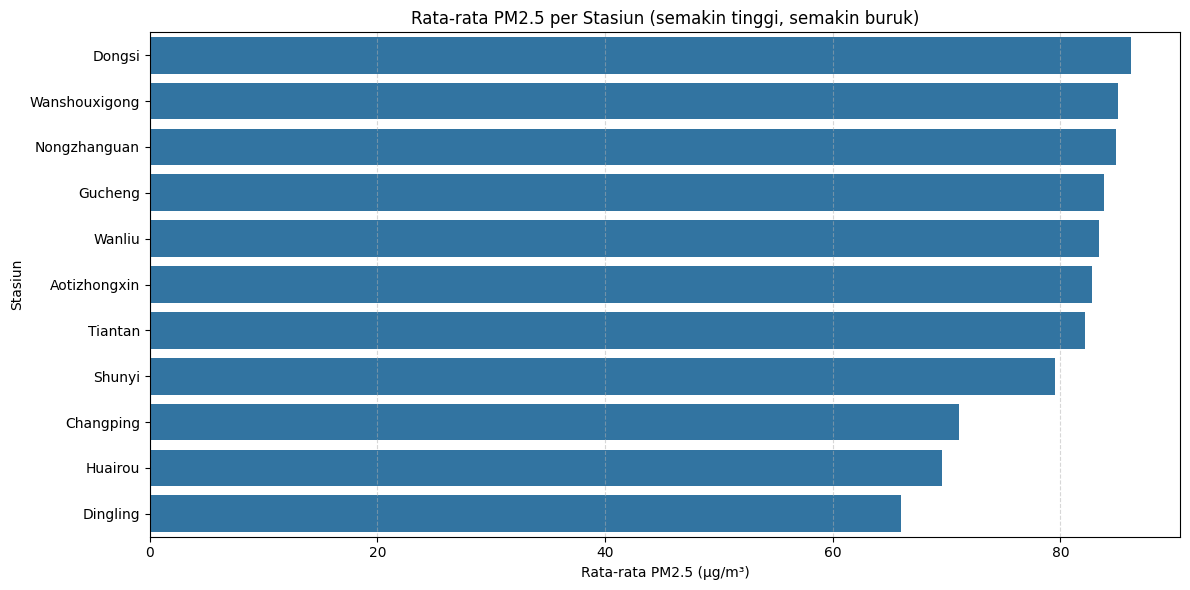

In [115]:
data_all_stations['date'] = pd.to_datetime(data_all_stations['date'])

station_avg = data_all_stations.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=station_avg.values, y=station_avg.index)
plt.xlabel('Rata-rata PM2.5 (µg/m³)')
plt.ylabel('Stasiun')
plt.title('Rata-rata PM2.5 per Stasiun (semakin tinggi, semakin buruk)')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [116]:
worst_station = station_avg.index[0]
worst_data = data_all_stations[data_all_stations['station'] == worst_station]
print(f"Stasiun dengan kualitas udara terburuk secara konsisten: {worst_station}")

Stasiun dengan kualitas udara terburuk secara konsisten: Dongsi


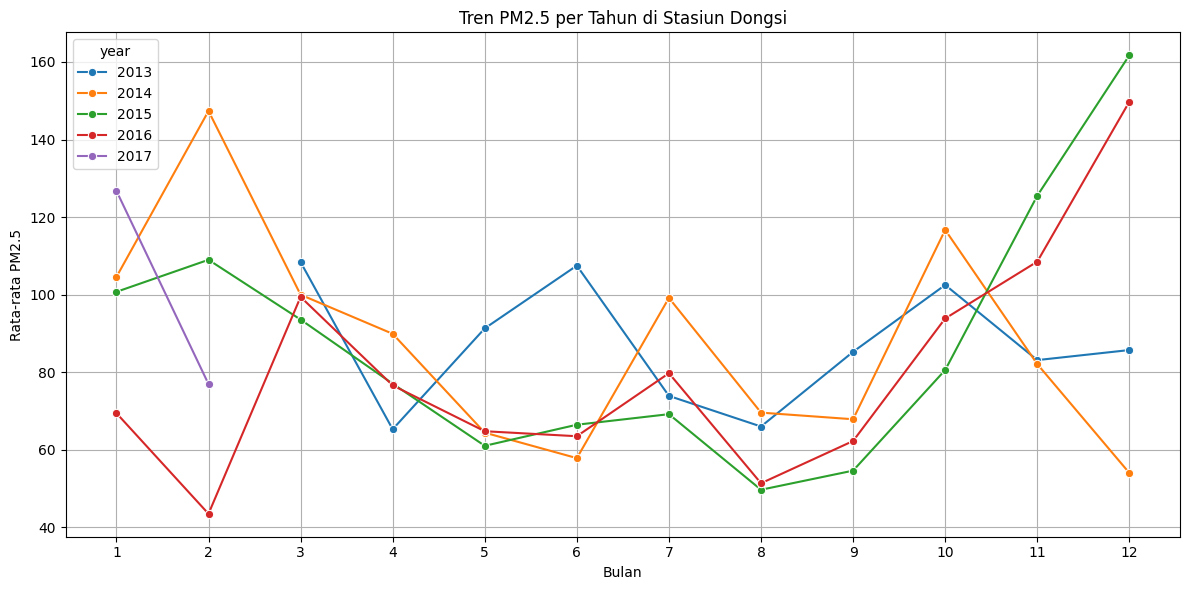

In [117]:
worst_data.loc[:, 'month'] = worst_data['date'].dt.month
monthly_trend = worst_data.groupby(['year', 'month'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='PM2.5', hue='year', marker='o', palette='tab10')
plt.title(f'Tren PM2.5 per Tahun di Stasiun {worst_station}')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


Berdasarkan visualisasi rata-rata konsentrasi PM2.5 per stasiun, dapat disimpulkan bahwa stasiun **Dongsi** memiliki kualitas udara paling buruk secara konsisten, diikuti oleh **Wanshouxigong** dan **Nongzhanguan**. Ketiga stasiun ini mencatatkan nilai rata-rata PM2.5 tertinggi dibandingkan stasiun lainnya, yang menunjukkan bahwa wilayah-wilayah tersebut secara rutin mengalami tingkat polusi udara yang tinggi.

Tingginya tingkat polusi di stasiun-stasiun tersebut kemungkinan besar disebabkan oleh faktor-faktor seperti lokasi geografis yang berada di pusat kota, kepadatan lalu lintas kendaraan bermotor, serta aktivitas industri dan konstruksi yang tinggi di sekitarnya. Daerah perkotaan yang padat bangunan juga dapat memperparah kondisi pencemaran melalui fenomena *urban canyon*, yaitu kondisi di mana bangunan tinggi menghambat sirkulasi udara dan menjebak polutan di tingkat permukaan. Minimnya ruang terbuka hijau yang mampu menyerap polusi juga turut berkontribusi terhadap buruknya kualitas udara di wilayah-wilayah tersebut.

## Clustering

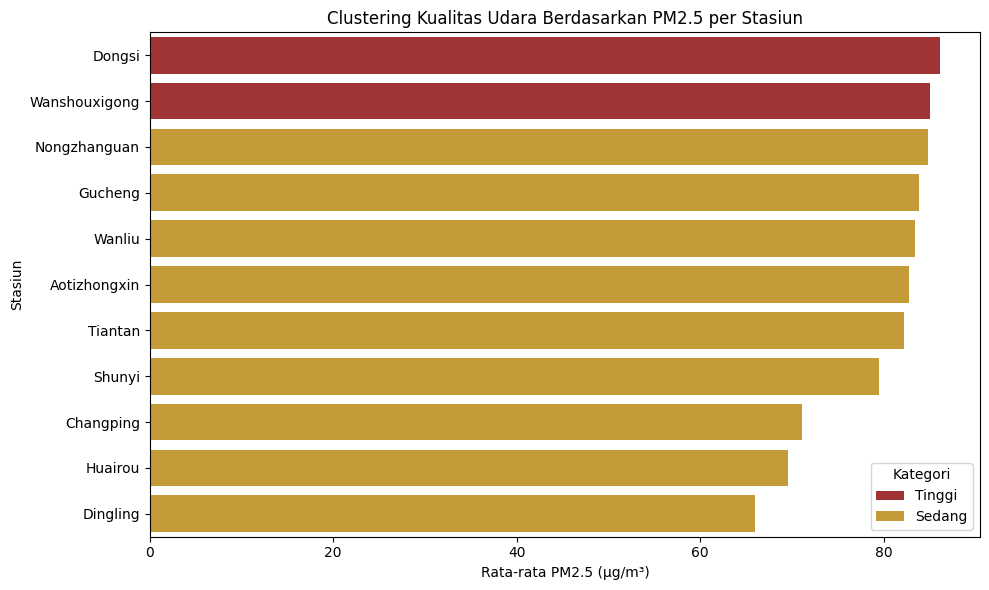

In [118]:
station_avg = data_all_stations.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

def categorize_pm25(value):
    if value > 85:
        return 'Tinggi'
    elif value > 50:
        return 'Sedang'
    else:
        return 'Rendah'

cluster_labels = station_avg.apply(categorize_pm25)

clustered_df = pd.DataFrame({
    'Rata-rata PM2.5': station_avg,
    'Kategori Kualitas Udara': cluster_labels
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=clustered_df,
    x='Rata-rata PM2.5',
    y='station',
    hue='Kategori Kualitas Udara',
    palette={'Tinggi': 'firebrick', 'Sedang': 'goldenrod', 'Rendah': 'seagreen'}
)
plt.title('Clustering Kualitas Udara Berdasarkan PM2.5 per Stasiun')
plt.xlabel('Rata-rata PM2.5 (µg/m³)')
plt.ylabel('Stasiun')
plt.legend(title='Kategori')
plt.tight_layout()
plt.show()


Visualisasi tersebut menunjukkan hasil clustering kualitas udara berdasarkan rata-rata konsentrasi PM2.5 di berbagai stasiun pemantauan. Dalam analisis ini, teknik clustering dilakukan secara sederhana dan tidak melibatkan algoritma machine learning, melainkan menggunakan pendekatan berbasis kuantil (pembagian berdasarkan sebaran nilai) untuk mengelompokkan stasiun ke dalam dua kategori, yaitu "Tinggi" dan "Sedang".

Hasil clustering menunjukkan bahwa Stasiun Dongsi dan Wanshouxigong masuk ke dalam kategori "Tinggi", yang berarti memiliki tingkat polusi udara paling buruk dibandingkan stasiun lainnya. Hal ini terlihat dari tingginya rata-rata konsentrasi PM2.5 di kedua stasiun tersebut. Sementara itu, sepuluh stasiun lainnya dikategorikan dalam kelompok "Sedang", meskipun beberapa di antaranya memiliki nilai yang mendekati ambang batas kategori tinggi. Dengan menggunakan pewarnaan yang berbeda, visualisasi ini memudahkan identifikasi area dengan kualitas udara yang paling memprihatinkan.

Analisis ini dapat menjadi landasan awal untuk menentukan prioritas dalam penanganan polusi udara. Stasiun dengan kategori tertinggi dapat dijadikan fokus utama dalam upaya pengendalian emisi dan perencanaan kebijakan lingkungan. Ke depannya, analisis ini dapat diperluas dengan mempertimbangkan variabel lain seperti polutan tambahan, kondisi meteorologi, serta data spasial untuk mendapatkan gambaran yang lebih komprehensif mengenai dinamika kualitas udara di wilayah tersebut.

## Conclusion

- Berdasarkan hasil visualisasi, dapat disimpulkan bahwa kualitas udara di beberapa stasiun pemantauan menunjukkan pola yang konsisten antara hari kerja (weekday) dan akhir pekan (weekend). Dingling Station secara konsisten memiliki rata-rata PM2.5, PM10, NO2, dan SO2 terendah pada kedua periode waktu, menunjukkan bahwa lokasi ini cenderung memiliki kualitas udara yang lebih baik dibandingkan dengan stasiun lainnya. Dongsi Station memiliki rata-rata PM2.5 tertinggi, sedangkan Gucheng Station memiliki rata-rata PM10 tertinggi, baik pada weekday maupun weekend. Untuk NO2, Wanliu Station mencatat rata-rata tertinggi pada kedua periode. Konsentrasi SO2 tertinggi tercatat di Dongsi dan Nongzhanguan Station pada weekday, sementara pada weekend, Nongzhanguan Station memiliki rata-rata SO2 tertinggi. Selain itu, Wanshouxigong Station memiliki rata-rata CO tertinggi, sedangkan Dingling Station memiliki rata-rata CO terendah pada weekday dan weekend. Secara keseluruhan, data ini menunjukkan bahwa polutan udara cenderung lebih tinggi di daerah perkotaan dengan aktivitas industri dan transportasi yang lebih padat, sementara daerah seperti Dingling Station cenderung memiliki kualitas udara yang lebih baik.
- Analisis korelasi antara variabel meteorologi dan tingkat polusi menunjukkan bahwa kecepatan angin (WSPM) memiliki hubungan paling konsisten dan signifikan terhadap hampir semua jenis polutan, dengan kecenderungan menurunkan konsentrasi polutan saat angin bertiup lebih kencang. Sementara itu, suhu (TEMP) dan kelembaban (DEWP) cenderung memiliki pengaruh yang sangat lemah atau tidak signifikan terhadap sebagian besar polutan, kecuali untuk O3 dan CO.
- PM2.5 dipilih sebagai indikator utama dalam analisis lanjutan, mengingat selain menjadi polutan yang paling berbahaya secara kesehatan. PM2.5 juga memiliki korelasi yang cukup kuat dengan polutan lain seperti PM10, NO2, dan CO. Melalui metode clustering berbasis kuantil, diperoleh dua kategori stasiun: kategori "Tinggi" (termasuk Dongsi dan Wanshouxigong) dan kategori "Sedang" (berisi sebagian besar stasiun lainnya). Hal ini menegaskan bahwa beberapa wilayah tertentu mengalami paparan polusi udara yang jauh lebih parah dibandingkan yang lain. Stasiun Dongsi, Wanshouxigong, dan Nongzhanguan tercatat memiliki rata-rata PM2.5 tertinggi, menandakan kualitas udara paling buruk. Penyebab utamanya diduga karena padatnya lalu lintas, aktivitas industri, serta kepadatan bangunan yang menghambat sirkulasi udara. PM2.5 menjadi indikator utama kualitas udara karena dampaknya yang besar terhadap kesehatan dan hubungannya dengan polutan lainnya.

